### Introduction

• State the project you are working on. State if you solved it as a regression or classification problem.
• The general proposal comments including instructions for how to convert a regression problem to a classification problem if 
that is what you are interested in working on.
• Describe the major findings you have identified based on your analysis.
• Which inputs/features seem to influence the response/outcome the most?
• What supported your conclusion? 
• Was it only through predictive models? 
• Could EDA help identify similar trends/relationships?
• Was clustering consistent with any conclusions from the predictive models?
• What skills did you learn from going through this project?
• This is not related to application or project inputs/outputs directly. What general skills can you take away from the project to
apply to applications more specific to your area of interest?

### Importing Libraries and Reading in the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('pitt_athletics_cmpinf2100_project.csv')

### EDA Basic Information

#### Exploratory Analysis - Number of Rows and Columns

In [3]:
df.shape

(3360, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   int64  
 1   age                 1567 non-null   float64
 2   gender              582 non-null    object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   int64  
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 393.9+

In this data there are 3360 rows and 15 columns.

#### Exploratory Analysis - Column Names and Data Types

In [5]:
df.columns

Index(['accountid', 'age', 'gender', 'distancemiles', 'direction',
       'peak_drivetime', 'offpeak_drivetime', 'season', 'purchase_month',
       'purchase_dow', 'price_type', 'price_level', 'ticket_count',
       'price_per_ticket', 'return_next_season'],
      dtype='object')

In [6]:
df.dtypes

accountid               int64
age                   float64
gender                 object
distancemiles         float64
direction              object
peak_drivetime        float64
offpeak_drivetime     float64
season                  int64
purchase_month         object
purchase_dow           object
price_type             object
price_level            object
ticket_count            int64
price_per_ticket      float64
return_next_season     object
dtype: object

Integers: accountid, Season, ticket_count

Floats: age, distancemiles, peak_drivetime, offpeak_drivetime, price_per_ticket

Objects: gender, direction, purchase_month, purchase_dow, price_type, price_level, return_next_season

#### Exploratory Analysis - Missing Values

In [7]:
df.isna().sum()

accountid                0
age                   1793
gender                2778
distancemiles            0
direction                0
peak_drivetime         402
offpeak_drivetime      364
season                   0
purchase_month           0
purchase_dow             0
price_type               0
price_level              0
ticket_count             0
price_per_ticket         0
return_next_season       0
dtype: int64

There are four columns that are missing data: age (1793), gender (2778), peak_drivetime (402), offpeak_drivetime (364). There is a lot of missing data which could cause issues when performing analysis. 

#### Handling missing values

In [8]:
df_clean = df.copy()
df_clean = df_clean.drop('peak_drivetime', axis=1)
df_clean = df_clean.drop('offpeak_drivetime', axis=1)
df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
df_clean['gender'].fillna('unknown', inplace=True)
df_clean.head()

accountid   age   gender  distancemiles direction  season purchase_month  \
0          1  57.0  unknown      10.816739         N    2016        Jan-Feb   
1          2  57.0  unknown       8.140205        NE    2016        Jan-Feb   
2          3  64.0     Male      39.413746         S    2016        Mar-Apr   
3          4  43.0  unknown      18.678836         W    2016        Jan-Feb   
4          5  57.0  unknown      16.487613         W    2016        Jan-Feb   

  purchase_dow price_type         price_level  ticket_count  price_per_ticket  \
0          Mon          A   Lower Panther Red             3             252.0   
1          Wed          A               Other             2             387.0   
2        Other          A  Lower Panther Blue             2             252.0   
3        Other          A   Lower Panther Red             5             252.0   
4          Wed          A  Lower Panther Blue             2             252.0   

  return_next_season  
0                YES  
1                YES  
2                YES  
3                YES  
4                 NO

In [9]:
df_clean['lump_gender']=np.where( df_clean.gender == 'unknown', df_clean.gender, 'Known')

In [10]:
df_clean['bin_age'] = pd.cut( df.age, bins=2, include_lowest=True, ordered=False, labels=['A', 'B'])
df_clean.bin_age = df_clean.bin_age.astype('object')
df_clean.bin_age.fillna(value='Unknown', inplace=True)

In [11]:
df_clean['lump_ticket_count'] = np.where( df.ticket_count > 4, '5 or more', df.ticket_count.astype('str') )

In [12]:
df_clean = df_clean.drop(['age','gender','ticket_count'],axis=1)

#### Exploratory Analysis - Unique Values

In [13]:
df.nunique()

accountid             3360
age                     70
gender                   4
distancemiles         3300
direction                8
peak_drivetime        2311
offpeak_drivetime     2333
season                   1
purchase_month           3
purchase_dow             6
price_type               4
price_level              8
ticket_count            20
price_per_ticket       113
return_next_season       2
dtype: int64

When investigating the unique values in the data, there could be an opportunity to treat ticket_count as a non-numeric for exploring the data. This is why we lumped the values for missing values.

#### EDA - Visualization

#### Categorical Counts

##### bin_age:

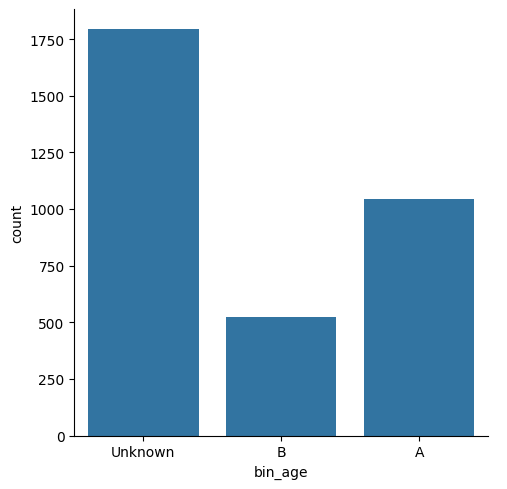

In [14]:
sns.catplot(data = df_clean, x='bin_age', kind='count')

plt.show()

The bin_age shows three groups of ages: A (younger), B (older), and Unknown.

##### Lump_Gender:

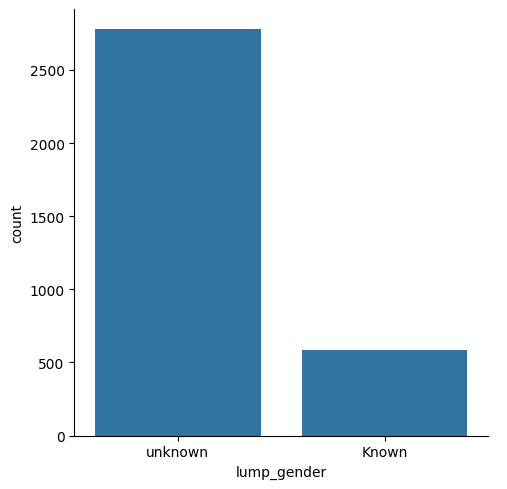

In [15]:
sns.catplot(data = df_clean, x='lump_gender', kind='count')

plt.show()

The data shows that there are two categories of gender: Unknown and Known from our lumping process. As anticipated, there is a larger number of unknowns than compared to knowns. 

##### price_type:

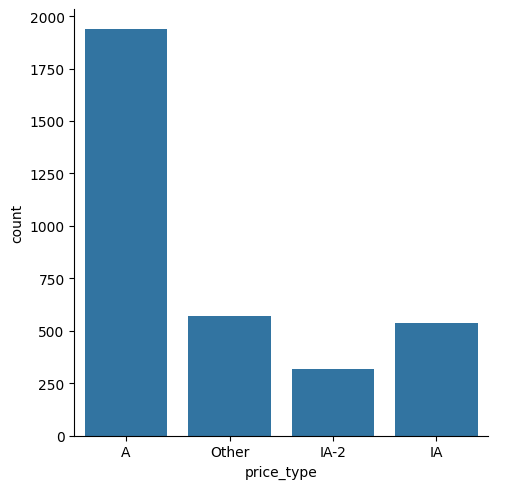

In [16]:
sns.catplot(data=df_clean, x='price_type', kind = 'count')
plt.show()

This variable can prove helpful. The price_type A is the most purchased across the categories. 

##### price_level:

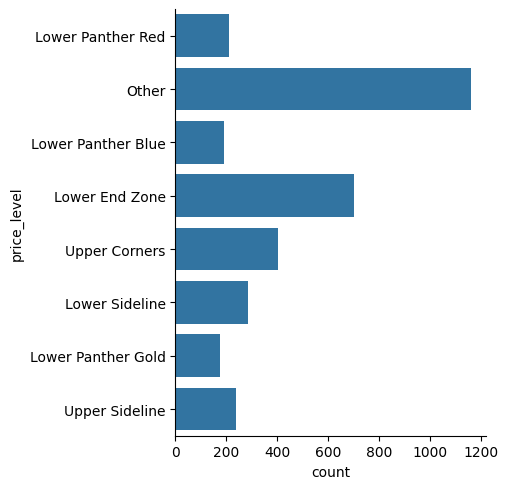

In [17]:
sns.catplot(data=df_clean, y='price_level', kind = 'count')
plt.show()

There is a good spread of information within these categories. Most interesting, though, is that the "other" category seems to have the highest count. Separating out this variable could prove helpful. 

##### lump_ticket_count:

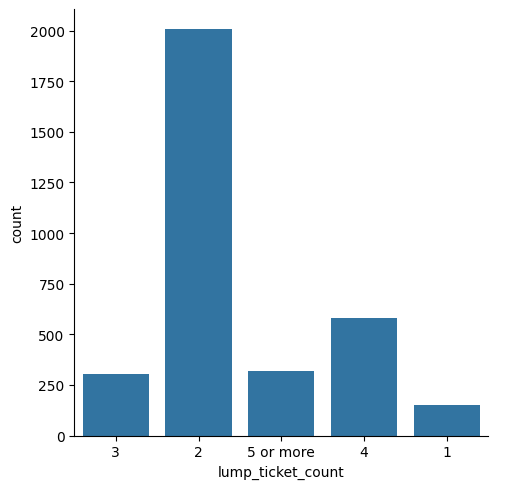

In [18]:
sns.catplot(data = df_clean, x='lump_ticket_count', kind='count')

plt.show()

This variable is being used as a non-numeric variable here post the lumping of the categories. The amount of tickets bought is an interesting category since there is a correlation between how many tickets have been purchased at one time. 

##### Output: return_next_season:

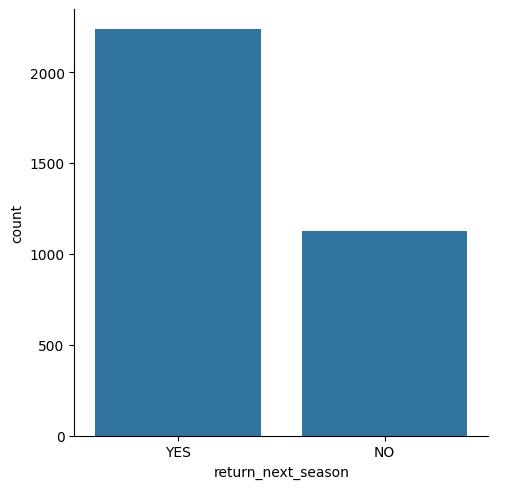

In [19]:
sns.catplot(data=df_clean, x='return_next_season', kind = 'count')
plt.show()

This is the output variable where it is tracked if someone buys season tickets the following year. 

##### Exploratory Analysis - Exploring Marginal Distributions with Continuous Variables

##### price_per_ticket:

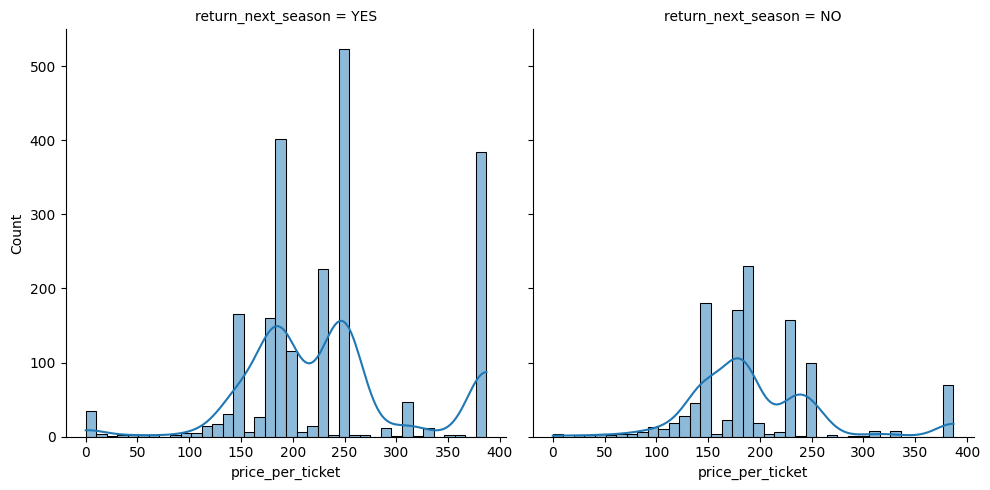

In [20]:
sns.displot(data = df_clean, x='price_per_ticket', kind='hist', col= 'return_next_season',kde=True)

plt.show()

This is used to determine how many tickets were bought at each price. 

##### distancemiles:

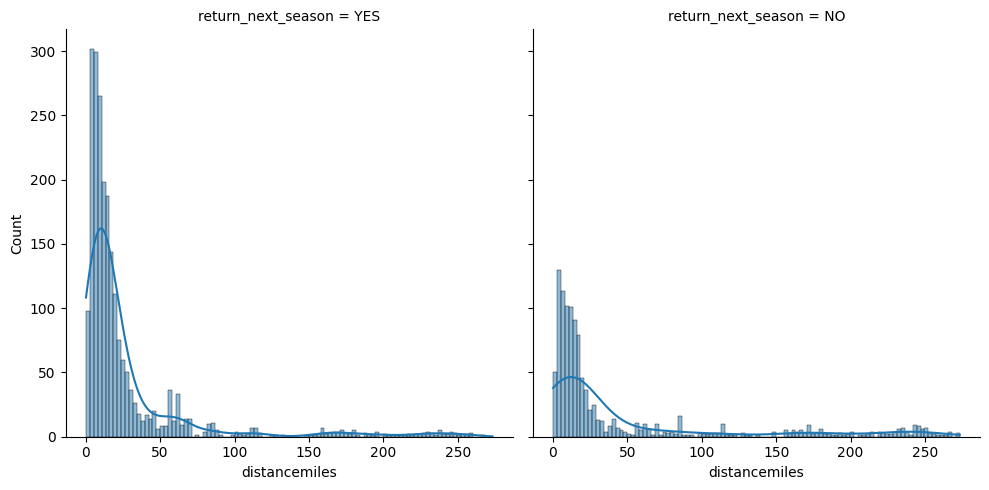

In [21]:
sns.displot(data = df_clean, x='distancemiles', kind='hist', col= 'return_next_season',kde=True)

plt.show()

This plot shows that the closer an individual is, the more likely they are to buy a season ticket. 

##### Exploratory Analysis - Categorical-to-Continuous Relationships

##### Comparing lump_gender and distancemiles with returning next season

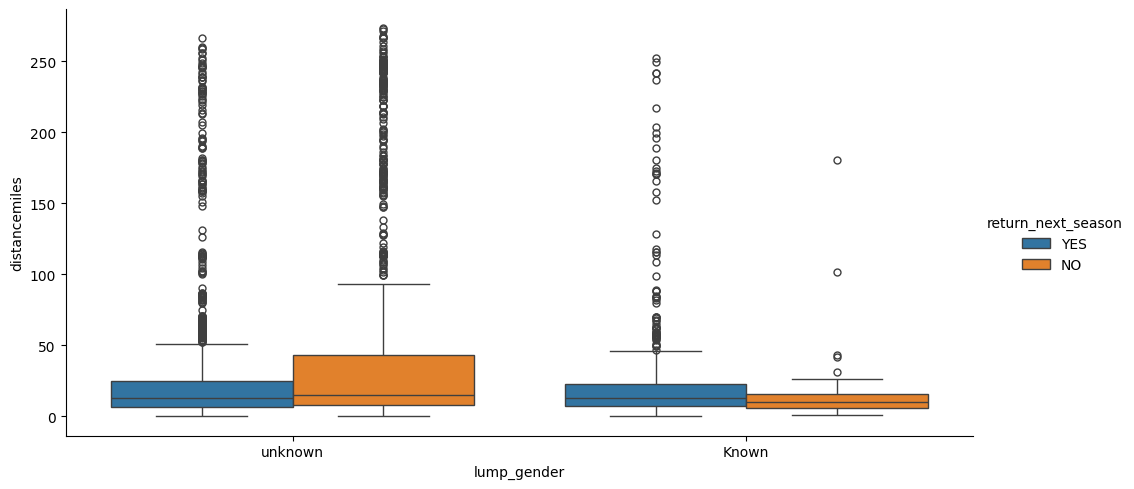

In [22]:
sns.catplot(data = df_clean, x='lump_gender', y='distancemiles', hue='return_next_season', kind='box', aspect = 2)

plt.show()

##### Comparing price_type and price_per_ticket with returning next season

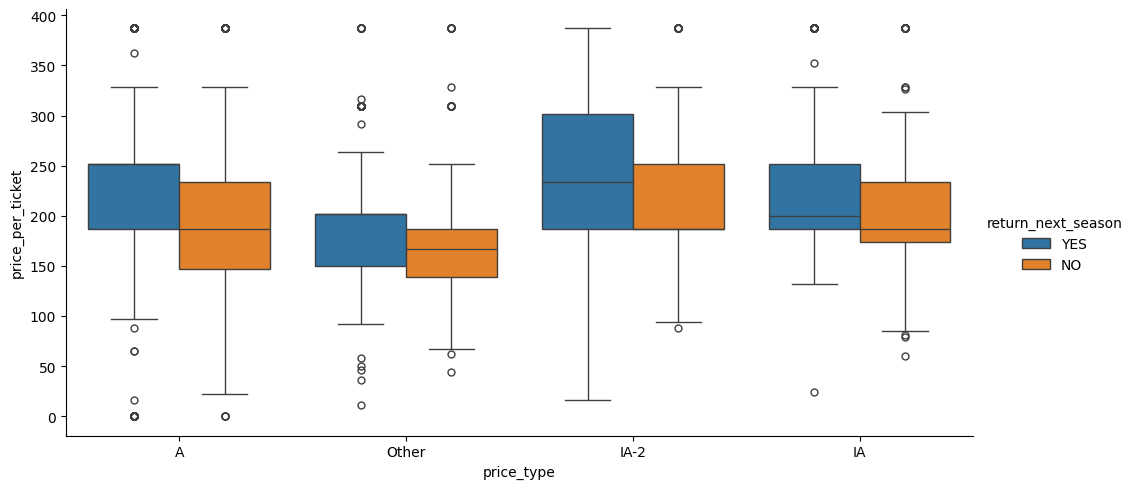

In [23]:
sns.catplot(data = df_clean, x='price_type', y='price_per_ticket', hue='return_next_season', kind='box', aspect = 2)

plt.show()

When looking at price_type and price_per_ticket, you can see that IA-2 and IA seem to be the highest-priced tickets. What is even more interesting is that the average of individuals who do not return the next season are cheaper than the ones that do return. 

##### Comparing price_level and price_per_ticket with returning next season

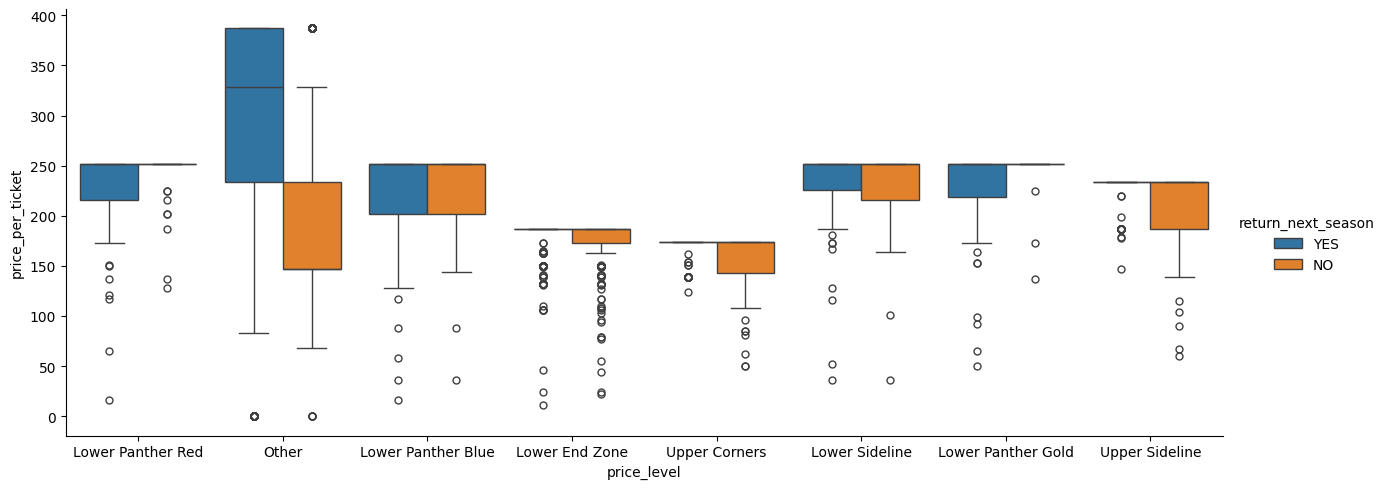

In [24]:
sns.catplot(data = df_clean, x='price_level', y='price_per_ticket', hue='return_next_season', kind='box', aspect = 2.5)

plt.show()

There are a lot of outliers in this view of price_level and price_per_ticket. Again this Other category holds most of the values and it would be good to dive deeper into it. 

##### Comparing lump_ticket_count and price_per_ticket with returning next season

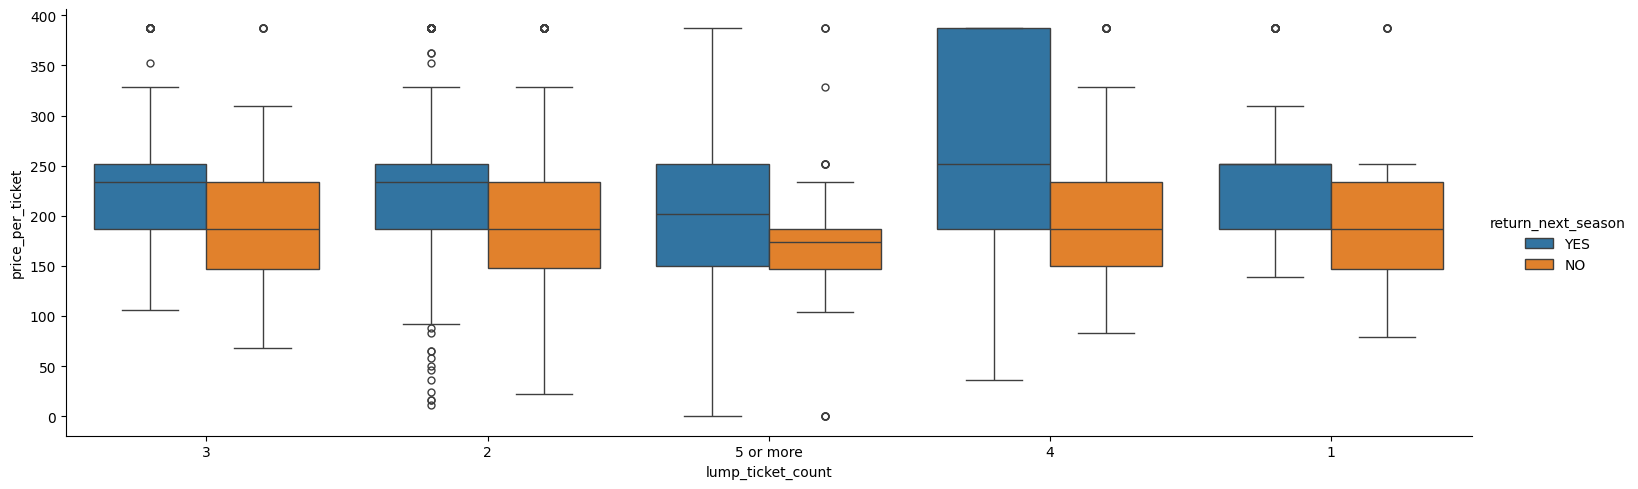

In [25]:
sns.catplot(data = df_clean, x='lump_ticket_count', y='price_per_ticket', hue='return_next_season', kind='box', aspect = 3)

plt.show()

##### Exploratory Analysis - Continuous-to-Continuous Relationships

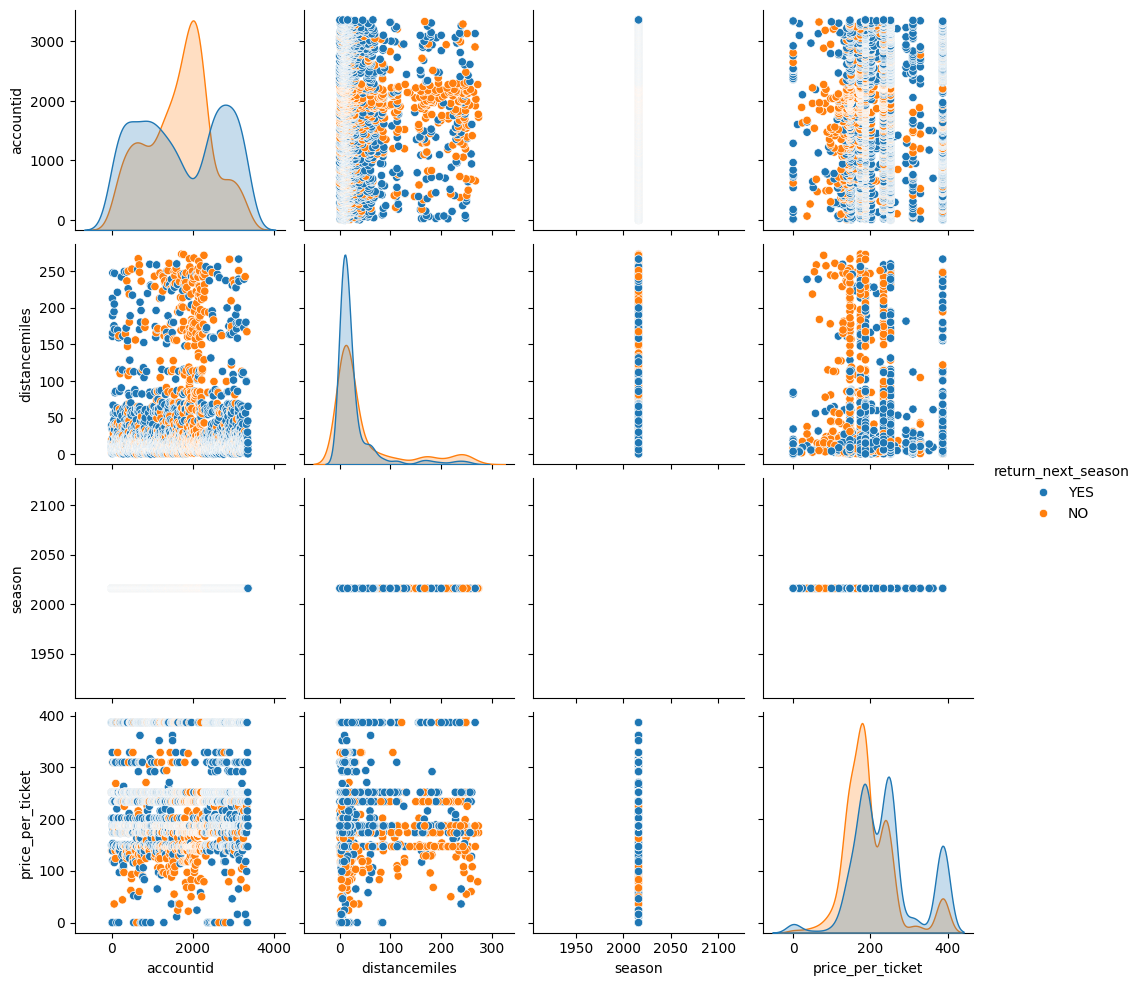

In [26]:
sns.pairplot(data = df_clean, hue='return_next_season',
             diag_kws={'common_norm': False})

plt.show()

The pairs plot reveals some interesting data. The conditional KDEs are showing the differences when someone returns the next season. 

##### Outcome Value and Categorical Input Unique Values

##### lump_ticket_count and price_type

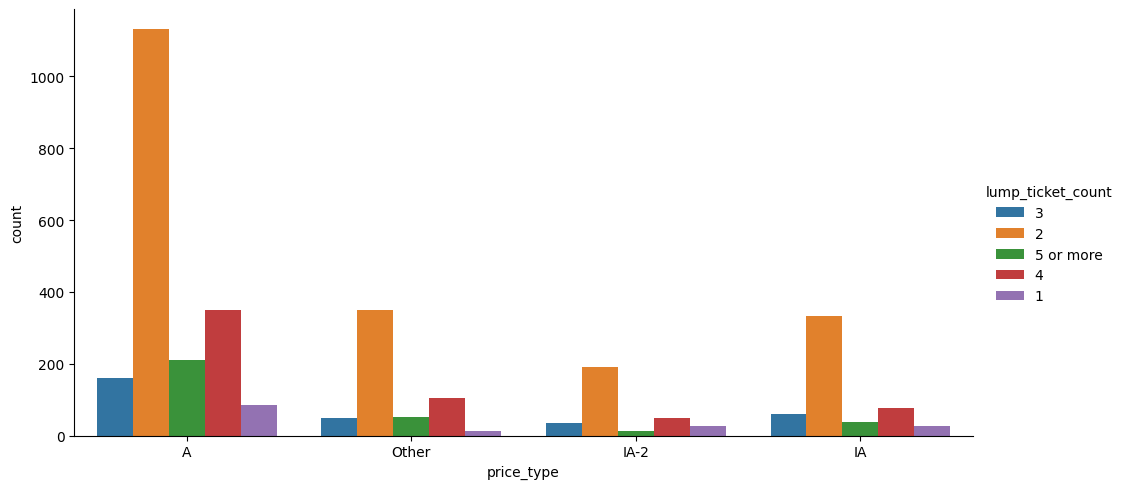

In [27]:
sns.catplot(data = df_clean, x='price_type', hue='lump_ticket_count', kind='count', aspect=2)

plt.show()

##### lump_ticket_count and price_level

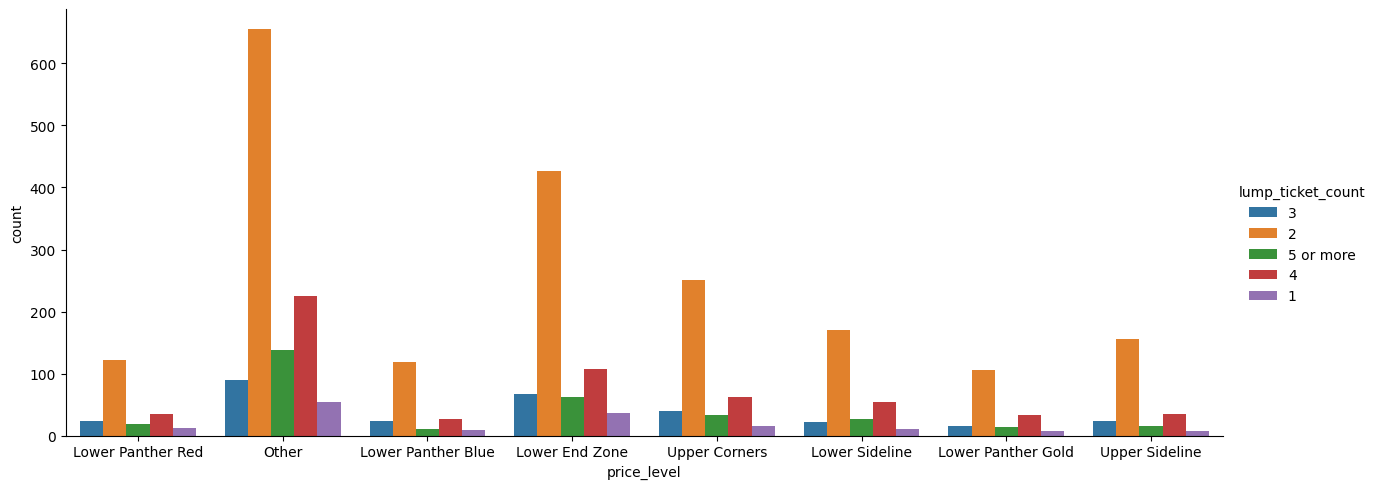

In [28]:
sns.catplot(data = df_clean, x='price_level', hue='lump_ticket_count', kind='count', aspect=2.5)

plt.show()

##### lump_ticket_count and return_next_season

sns.catplot(data = df_clean, x='return_next_season', hue='lump_ticket_count', kind='count', aspect=2)

plt.show()

##### purchase_month and price_type


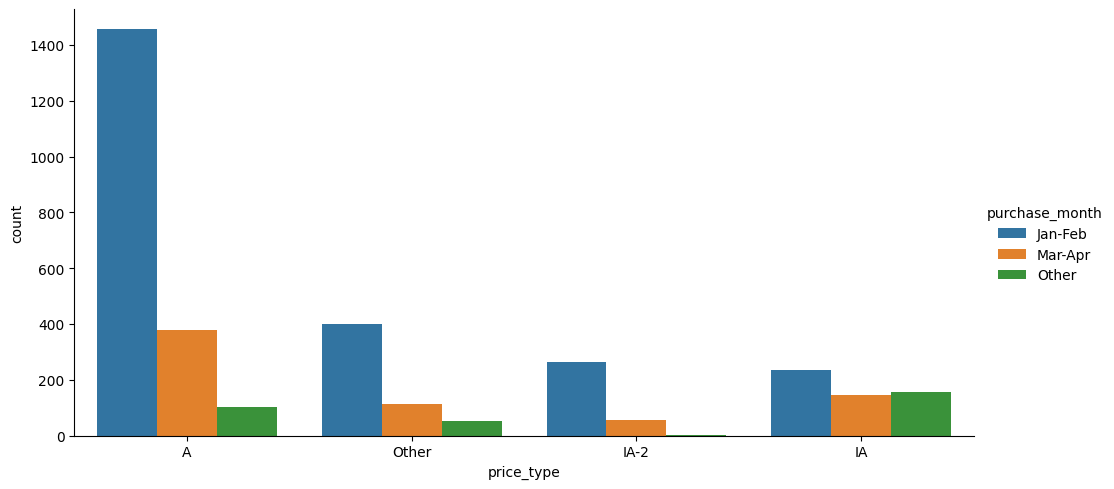

In [29]:
sns.catplot(data = df_clean, x='price_type', hue='purchase_month', kind='count', aspect=2)

plt.show()

##### purchase_month and return_next_season

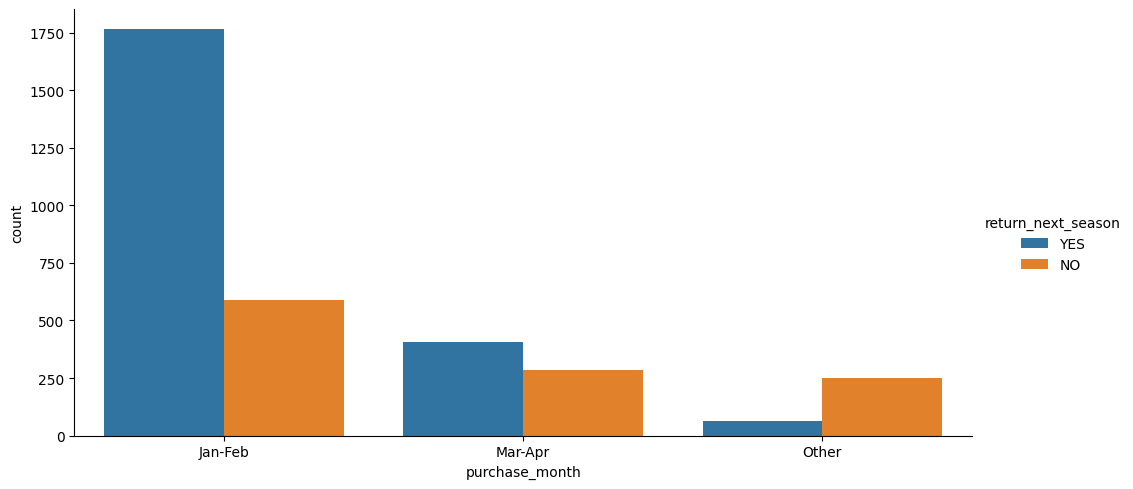

In [30]:
sns.catplot(data = df_clean, x='purchase_month', hue='return_next_season', kind='count', aspect=2)

plt.show()

##### Price_type and price_level 

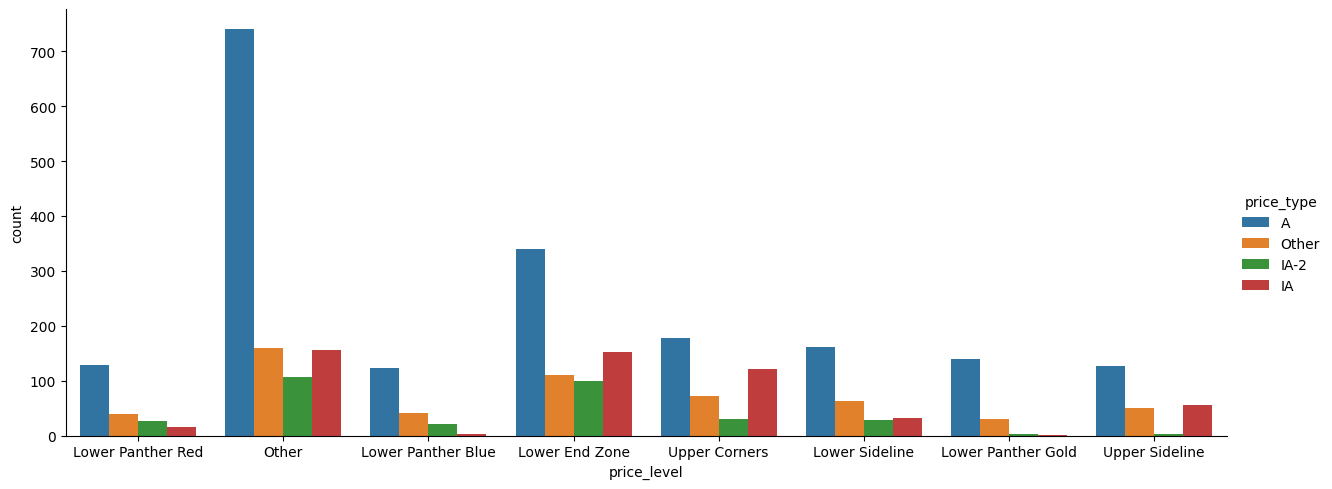

In [31]:
sns.catplot(data = df_clean, x='price_level', hue='price_type', kind='count', aspect=2.5)

plt.show()

##### price_level and return_next_season

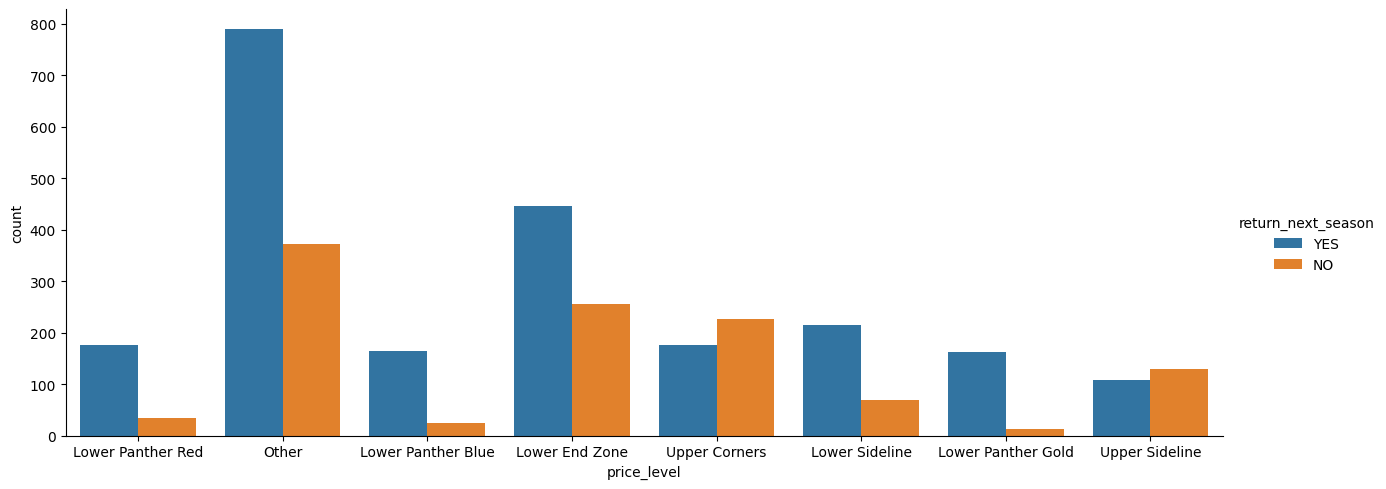

In [32]:
sns.catplot(data = df_clean, x='price_level', hue='return_next_season', kind='count', aspect=2.5)

plt.show()

Most of the price levels have individuals returning next season, and more so than not. However Upper Corners and Upper Sideline have the opposite. This will need to be investigates as there seems to be a cooralation. It would also be good to understand the "Other" category since most of the prices seem to be in that bucket. 

### Clustering

Clustering analysis to identify distinct groups within the dataset based on similarities in multiple dimensions.

In [33]:
df_clean_features = df_clean.select_dtypes('number').copy()
df_clean_features = df_clean_features.drop(columns=['accountid', 'season'])
df_clean_features.head()

distancemiles  price_per_ticket
0      10.816739             252.0
1       8.140205             387.0
2      39.413746             252.0
3      18.678836             252.0
4      16.487613             252.0

In [34]:
Xdf = StandardScaler().fit_transform( df_clean_features )

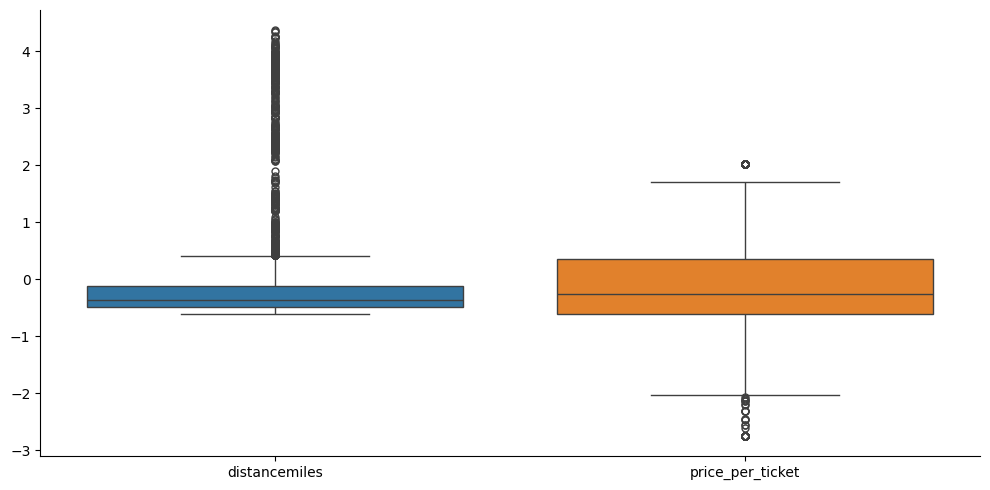

In [35]:
sns.catplot(data = pd.DataFrame(Xdf, columns=df_clean_features.columns), kind='box', aspect=2)

plt.show()

'distancemiles' has a compact central range but many extreme high-value outliers, while 'price_per_ticket' has a high range with a few mild outliers.

#### Performing K-means clustering.

In [36]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( Xdf )

In [37]:
df_clean_copy = df_clean.copy()

In [38]:
df_clean_copy['k2'] = pd.Series( clusters_2, index=df_clean_copy.index ).astype('category')

In [39]:
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   accountid           3360 non-null   int64   
 1   distancemiles       3360 non-null   float64 
 2   direction           3360 non-null   object  
 3   season              3360 non-null   int64   
 4   purchase_month      3360 non-null   object  
 5   purchase_dow        3360 non-null   object  
 6   price_type          3360 non-null   object  
 7   price_level         3360 non-null   object  
 8   price_per_ticket    3360 non-null   float64 
 9   return_next_season  3360 non-null   object  
 10  lump_gender         3360 non-null   object  
 11  bin_age             3360 non-null   object  
 12  lump_ticket_count   3360 non-null   object  
 13  k2                  3360 non-null   category
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 344.8+ KB


In [40]:
df_clean_copy.k2.value_counts()

k2
0    3068
1     292
Name: count, dtype: int64

#### Pair plot visualization to observe the distribution and relationship between different features, colored by identified clusters, to gain insights into data segmentation

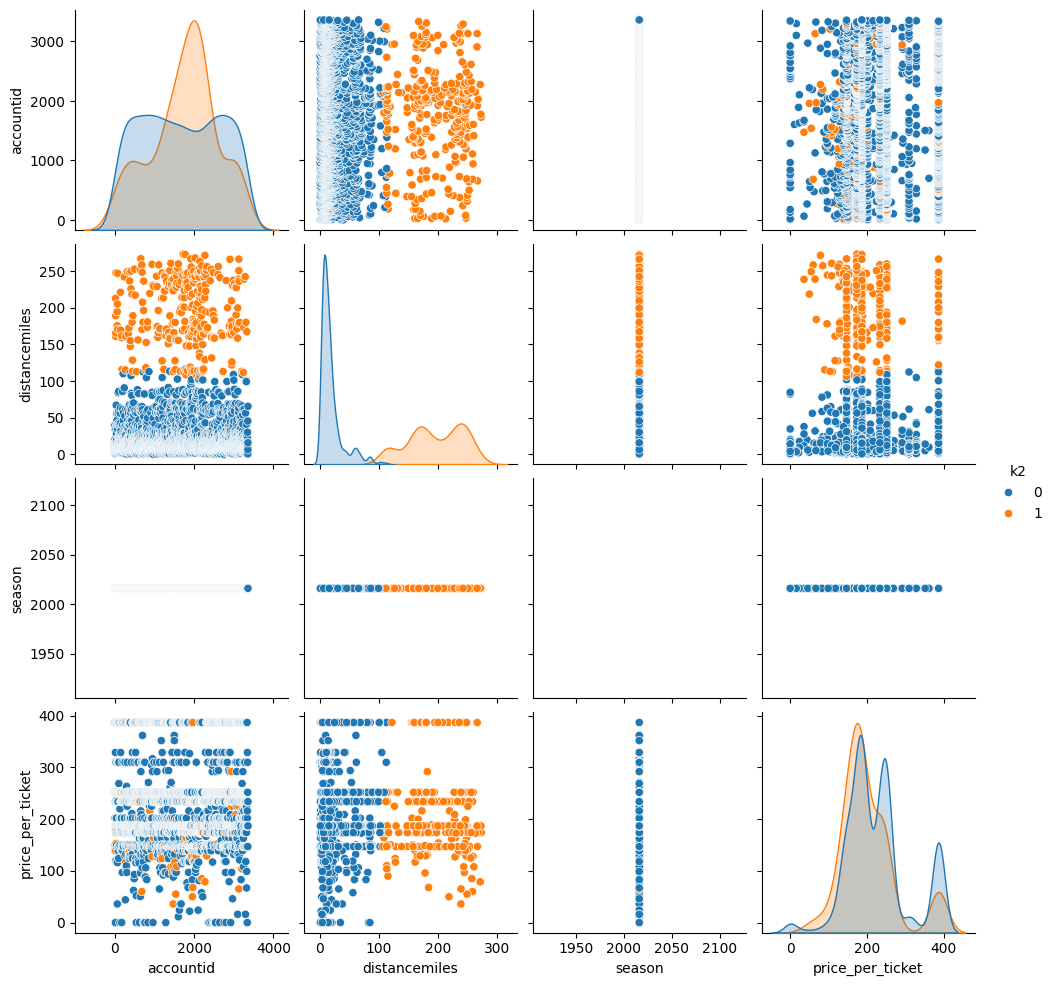

In [41]:
sns.pairplot(data = df_clean_copy, hue='k2', diag_kws={'common_norm': False})

plt.show()

Some relationships between features are linear, and some feature combinations continue to show clear distinctions between the two clusters.

#### Heatmap to visualize the distribution of clusters against the 'return next season' variable, providing a clear view of their relationship.

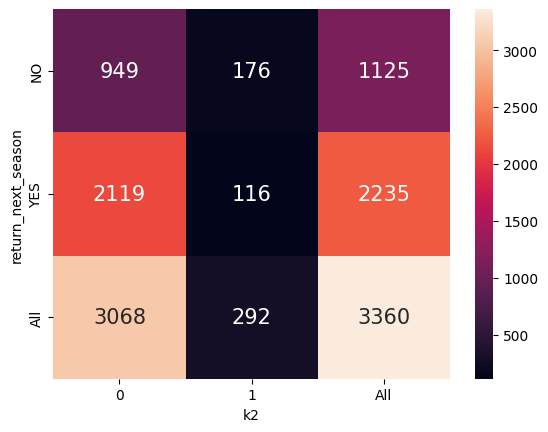

In [42]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_clean_copy.return_next_season, df_clean_copy.k2, margins=True ), 
            annot=True, annot_kws={"fontsize": 15}, fmt='g',
            ax=ax)

plt.show()

The heatmap indicates a significant overlap between the clusters and the 'return next season' status, with one cluster predominantly representing those who will return, highlighting a potential pattern or segmentation within the dataset

#### Cluster pair plot to reveal the structure and inter-variable relationships within the data, highlighting distinct groupings for further analysis

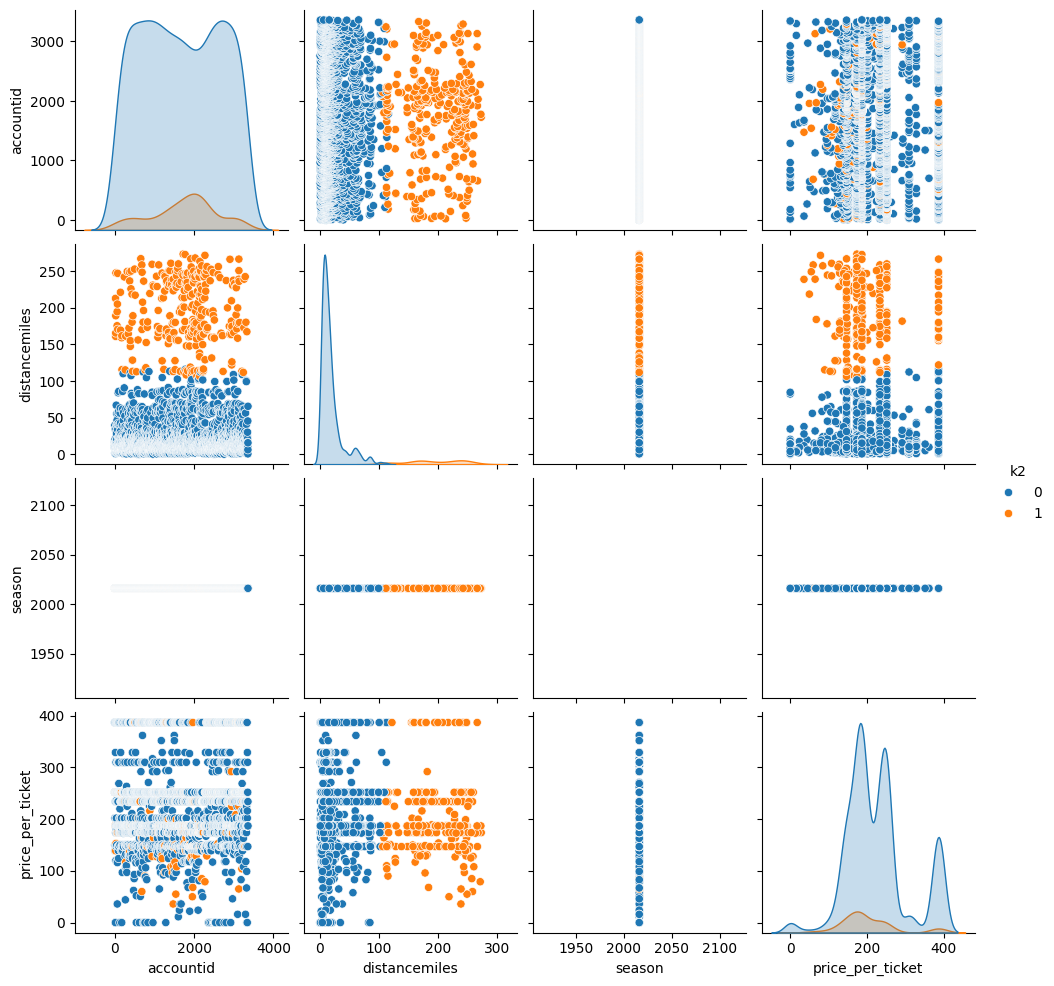

In [43]:
sns.pairplot(data = df_clean_copy, hue='k2')

plt.show()

The pair plot suggests distinct clusters within the dataset, indicating variations in customer behavior and preferences, particularly visible in features like price_per_ticket and distancemiles.

#### Finding optimal number of clusters

In [44]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit( Xdf )
    
    tots_within.append( km.inertia_ )

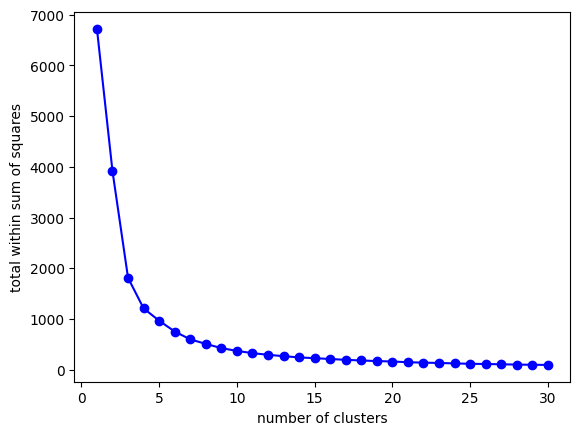

In [45]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

Based on this elbow plot, a reasonable choice for the number of clusters might be 4.

####  Applying Principal Component Analysis (PCA)

In [46]:
pca = PCA(n_components=2).fit_transform( Xdf )

In [47]:
pca_df = pd.DataFrame( pca, columns=['pc01', 'pc02'] )
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    3360 non-null   float64
 1   pc02    3360 non-null   float64
dtypes: float64(2)
memory usage: 52.6 KB


#### Plot for first two principal components to uncover data variance and potential clusters

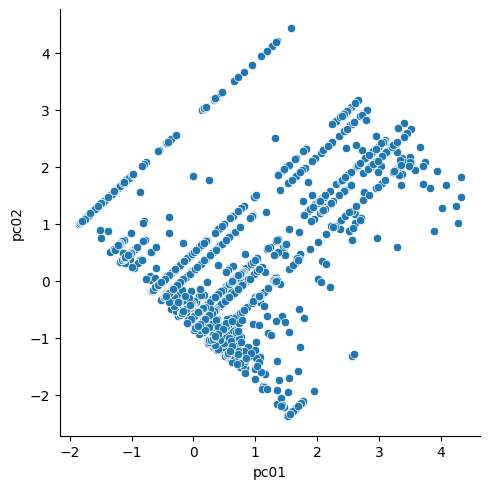

In [48]:
sns.relplot(data = pca_df, x='pc01', y='pc02')

plt.show()

There is no clear separation or clustering visible in this two-dimensional PCA space. The points seem to be distributed in a somewhat continuous, dense cloud without distinct groupings.

#### Correlation matrix of the first two principal components

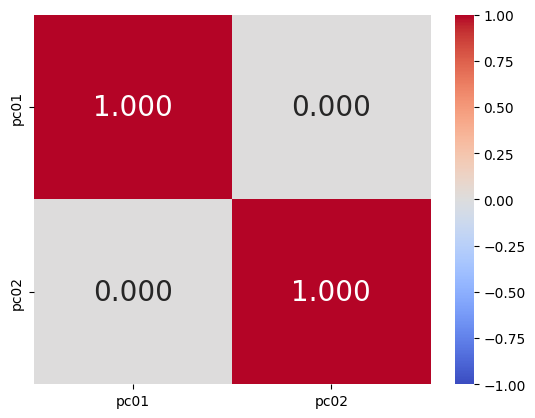

In [49]:
fig, ax = plt.subplots()

sns.heatmap( pca_df.corr(numeric_only=True),
             vmin=-1, vmax=1, center=0,
             cmap='coolwarm',
             annot=True, annot_kws={'fontsize': 20}, fmt='.3f',
             ax=ax)

plt.show()

The heatmap displays a perfect lack of correlation (0) between pc01 and pc02, suggesting that the PCA has effectively captured distinct and independent sources of variance in the data.

#### Scatter plot with a linear regression fit line across the first two principal components to evaluate the linear association between them.

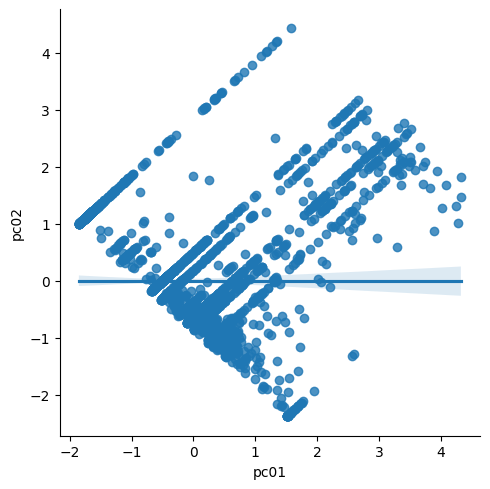

In [50]:
sns.lmplot(data = pca_df, x='pc01', y='pc02')

plt.show()

The data points are scattered across the principal component axes, with a number of distinct lines of points sloping upwards from left to right, suggesting a possible relationship between pc01 and pc02 that might correspond to underlying patterns.

In [51]:
pca_df['return_next_season'] = df_clean.return_next_season
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pc01                3360 non-null   float64
 1   pc02                3360 non-null   float64
 2   return_next_season  3360 non-null   object 
dtypes: float64(2), object(1)
memory usage: 78.9+ KB


#### Linear regression plot with the principal components differentiated by 'return next season' status to investigate any linear patterns between components with respect to the outcome variable.

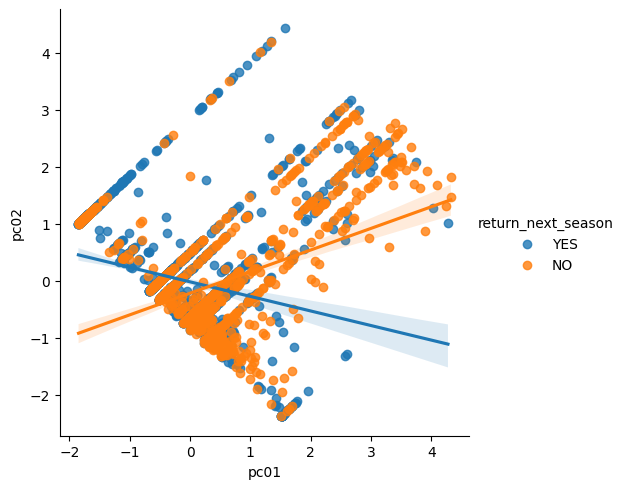

In [52]:
sns.lmplot(data = pca_df, x='pc01', y='pc02', hue='return_next_season')

plt.show()

In [53]:
pca_df['k2'] = pd.Series( clusters_2, index=pca_df.index ).astype('category')
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   pc01                3360 non-null   float64 
 1   pc02                3360 non-null   float64 
 2   return_next_season  3360 non-null   object  
 3   k2                  3360 non-null   category
dtypes: category(1), float64(2), object(1)
memory usage: 82.3+ KB


#### Plot for first two principal components to uncover data variance and potential clusters

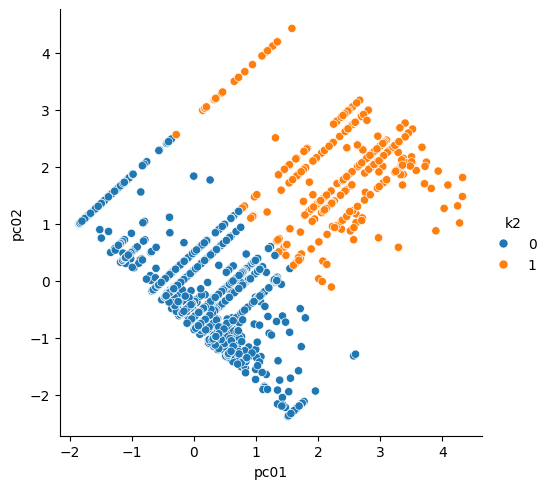

In [54]:
sns.relplot(data = pca_df, x='pc01', y='pc02', hue='k2')

plt.show()

The two clusters appear to be distinctly separated along the pc02 axis. This shows that the second principal component is capturing a key variance in the data that contributes to the clustering.

#### Hierarchical Clustering

In [55]:
hclust_complete = hierarchy.complete( Xdf )

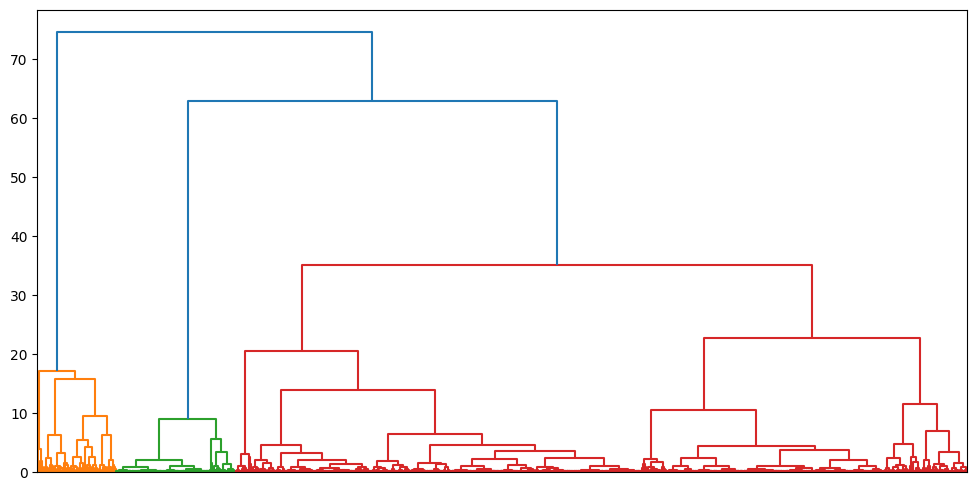

In [56]:
hclust_ward = hierarchy.ward( Xdf )

fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_ward, no_labels=True )

plt.show()

It seems like there are 2 major clusters.

#### Hierarchical clustering using single linkage on normalized features to trace data point linkages based on nearest neighbor distances

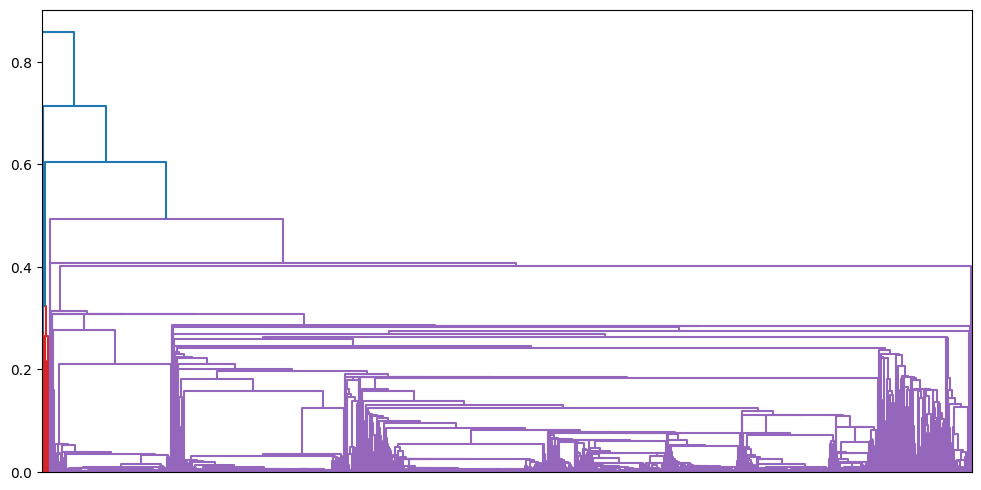

In [57]:
hclust_single = hierarchy.single( Xdf )

fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_single, no_labels=True )

plt.show()

#### Hierarchical clustering using average linkage on normalized features to trace data point linkages based on nearest neighbor distances

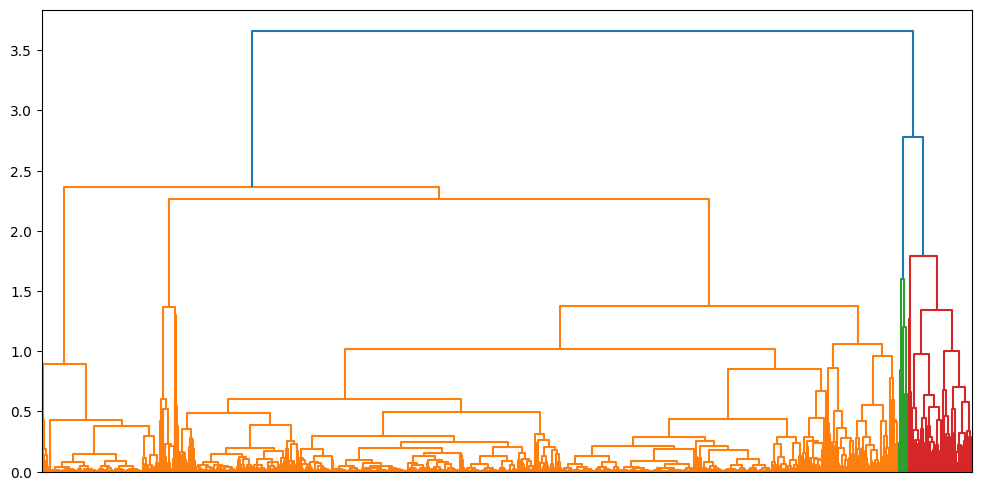

In [58]:
hclust_average = hierarchy.average( Xdf )

fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_average, no_labels=True )

plt.show()

 #### Dendrogram using centroid linkage to illustrate the clustering structure based on the centroids of the data points.

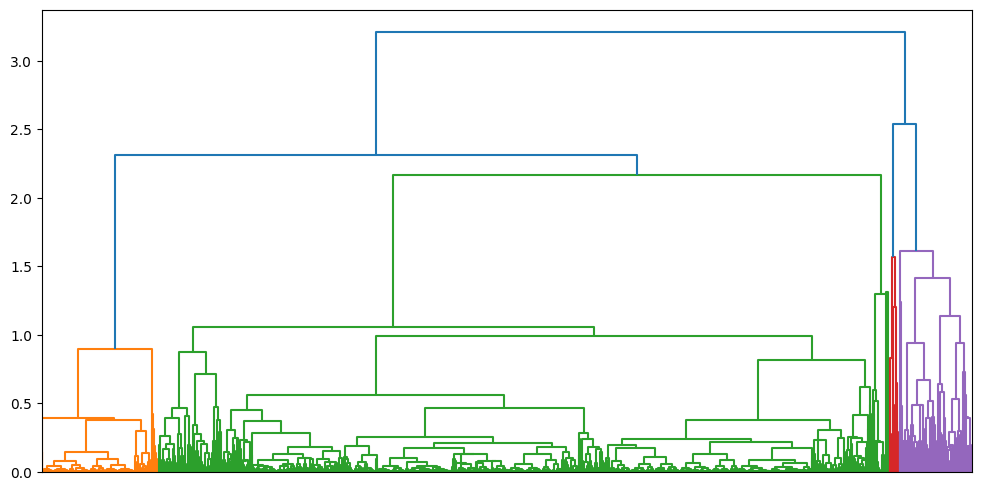

In [59]:
hclust_centroid = hierarchy.centroid( Xdf )

fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_centroid, no_labels=True )

plt.show()


The dendrogram suggests a clustering pattern where a few large clusters are formed at higher distances, indicating that there are some distinct groups in the data. Simultaneously, many smaller clusters form at the lower levels of the hierarchy, implying finer subgroups or close relationships among certain data points.

In [60]:
pca_df['hclust_2'] = pd.Series( hierarchy.cut_tree( hclust_ward, n_clusters=2 ).ravel(),
                                     index=pca_df.index ).astype('category')
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   pc01                3360 non-null   float64 
 1   pc02                3360 non-null   float64 
 2   return_next_season  3360 non-null   object  
 3   k2                  3360 non-null   category
 4   hclust_2            3360 non-null   category
dtypes: category(2), float64(2), object(1)
memory usage: 85.6+ KB


In [61]:
pca_df.nunique()

pc01                  3337
pc02                  3337
return_next_season       2
k2                       2
hclust_2                 2
dtype: int64

In [62]:
pca_df.hclust_2.value_counts()

hclust_2
0    3075
1     285
Name: count, dtype: int64

#### Categorical count plot for the distribution of data points across two clusters identified by hierarchical clustering.

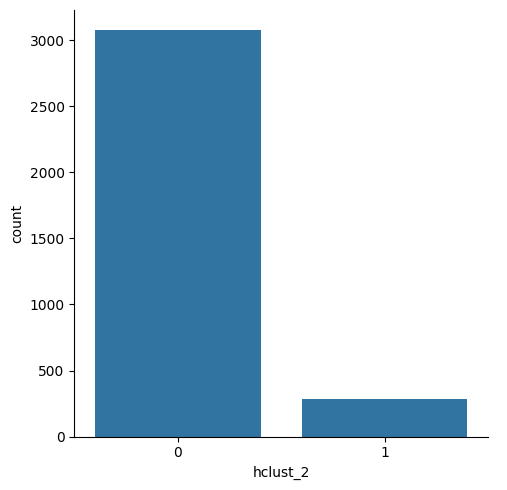

In [63]:
sns.catplot(data = pca_df, x='hclust_2', kind='count')

plt.show()

The resulting plot shows a significant imbalance between the two clusters, with one cluster containing the majority of data points and the other being much smaller, which could suggest a dominant grouping within the dataset.

#### Scatter plot of the dataset's first two principal components, color-coded by the two hierarchical clusters.

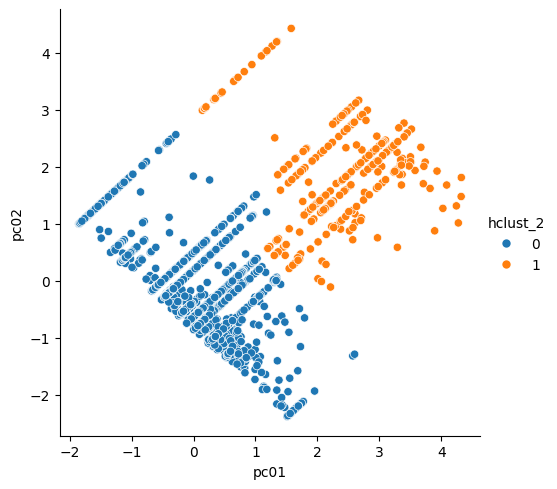

In [64]:
sns.relplot(data = pca_df, x='pc01', y='pc02', hue='hclust_2')

plt.show()

The plot suggests that the hierarchical clustering has identified two groups.

#### Count plot to compare the frequencies of the 'return next season' categories within the two identified hierarchical clusters

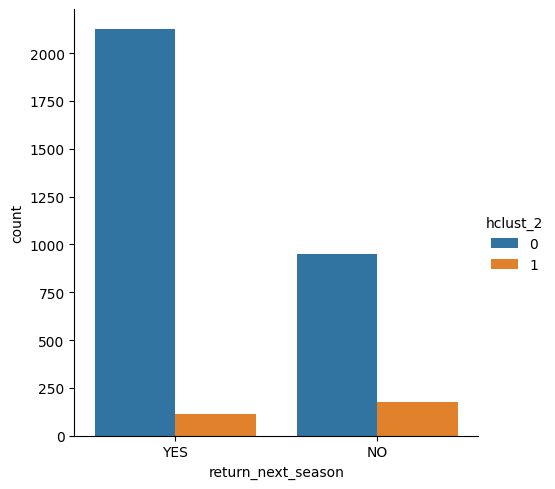

In [65]:
sns.catplot(data = pca_df, x='return_next_season', hue='hclust_2', kind='count')

plt.show()

The plot shows how the two clusters are distributed with respect to the 'return next season' outcome, indicating a cluster's tendency to either retain or lose members.

#### Heatmap visualization of a cross-tabulation between 'return next season' status and hierarchical cluster membership, with counts annotated for clarity.

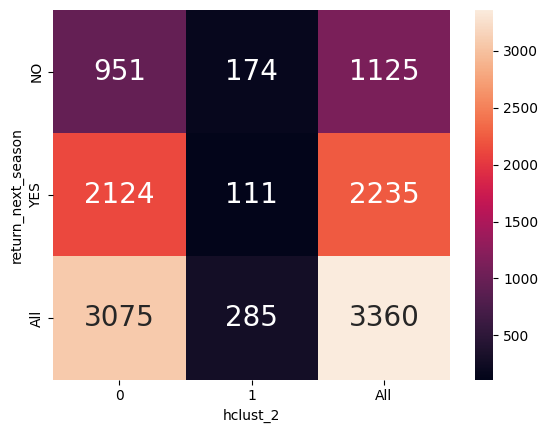

In [66]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( pca_df.return_next_season, pca_df.hclust_2, margins=True ),
            annot=True, annot_kws={'fontsize': 20}, fmt='g', 
            ax=ax)

plt.show()

The heatmap likely the number of individuals in each cluster who are expected to return or not for the next season, offering a visual comparison of the clusters' composition in relation to retention.

In [67]:
df_clean_copy['hclust_2'] = pca_df.hclust_2

In [68]:
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   accountid           3360 non-null   int64   
 1   distancemiles       3360 non-null   float64 
 2   direction           3360 non-null   object  
 3   season              3360 non-null   int64   
 4   purchase_month      3360 non-null   object  
 5   purchase_dow        3360 non-null   object  
 6   price_type          3360 non-null   object  
 7   price_level         3360 non-null   object  
 8   price_per_ticket    3360 non-null   float64 
 9   return_next_season  3360 non-null   object  
 10  lump_gender         3360 non-null   object  
 11  bin_age             3360 non-null   object  
 12  lump_ticket_count   3360 non-null   object  
 13  k2                  3360 non-null   category
 14  hclust_2            3360 non-null   category
dtypes: category(2), float64(2), int64(2), 

In [69]:
lf = df_clean_copy.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'return_next_season', 'hclust_2'],
     value_vars=df_clean_features.columns)

In [70]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   rowid               6720 non-null   int64   
 1   return_next_season  6720 non-null   object  
 2   hclust_2            6720 non-null   category
 3   variable            6720 non-null   object  
 4   value               6720 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 216.8+ KB


#### Box plots for the features 'distancemiles' and 'price_per_ticket' categorized by the two hierarchical clusters.

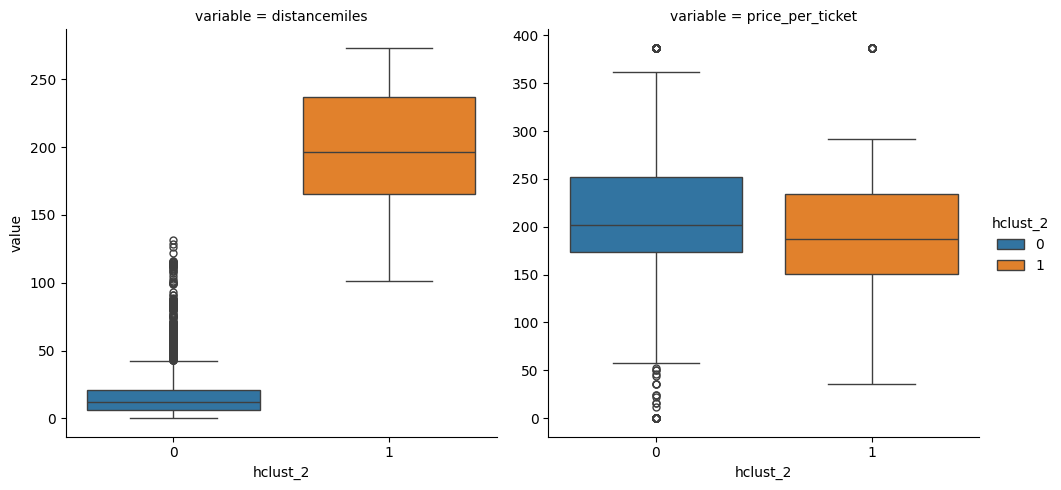

In [71]:
sns.catplot(data = lf, x='hclust_2', y='value', col='variable', hue='hclust_2',col_wrap=2,
            kind='box',
            sharey=False)

plt.show()

There's a marked difference between the clusters for variable distancemiles. Cluster 0 (blue) shows a tight distribution with a lower median distance traveled, whereas Cluster 1 (orange) has a higher median and a wider interquartile range, indicating that members of this cluster generally travel further distances.The 'price_per_ticket' distribution between the two clusters shows some variation. Cluster 0's boxplot has a higher median ticket price, as well as a broader interquartile range and outliers, suggesting greater variance in ticket prices for cluster 0 than for cluster 1.

### Fitting a Model

First lets create the coefplot function.

In [72]:
def my_coefplot(mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

The Pitt Athletics project is based on classification. The output is return_next_season and is a binary category. Valuable inputs are bin_age, lump_gender, lump_ticket_count, distancemiles, direction, purchase_month, purchase_dow, price_type, price_level, and price_per_ticket.

In [73]:
df_clean

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  
0        unknown  Unknown                 3  
1        unknown  Unknown                 2  
2          Known        B                 2  
3        unknown        A         5 or more  
4        unknown  Unknown                 2  
...          ...      ...               ...  
3355     unknown  Unknown                 2  
3356     unknown        B                 2  
3357     unknown        A                 2  
3358     unknown        B                 2  
3359     unknown        A                 2  

[3360 rows x 13 columns]

Let's quickly look at the binary category.

In [74]:
df_clean.return_next_season.value_counts()

return_next_season
YES    2235
NO     1125
Name: count, dtype: int64

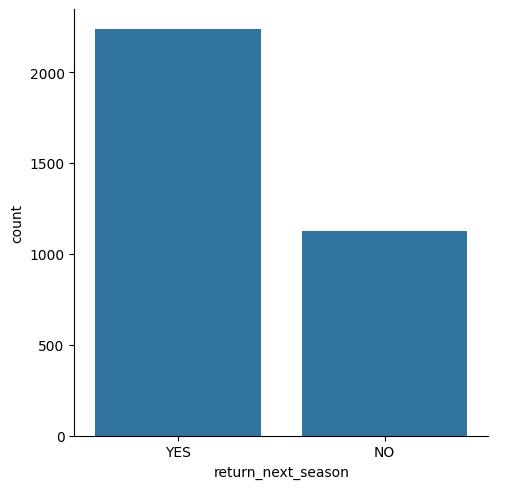

In [75]:
sns.catplot(data = df_clean, x='return_next_season', kind='count')

plt.show()

Now need to change the "yes" to "1" and the "no" to "0".

In [76]:
df_clean['return_next_season_b'] = df['return_next_season'].replace({'YES':1,'NO':0})

In [77]:
df_clean

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  
0        unknown  Unknown                 3                     1  
1        unknown  Unknown                 2                     1  
2          Known        B                 2                     1  
3        unknown        A         5 or more                     1  
4        unknown  Unknown                 2                     0  
...          ...      ...               ...                   ...  
3355     unknown  Unknown                 2                     1  
3356     unknown        B                 2                     1  
3357     unknown        A                 2                     1  
3358     unknown        B                 2                     1  
3359     unknown        A                 2                     1  

[3360 rows x 14 columns]

In [78]:
df_clean.return_next_season_b.value_counts()

return_next_season_b
1    2235
0    1125
Name: count, dtype: int64

2235 rows have returned for the next season. 1125 did not. 

#### Logistic Trend Plots

Now we will look at the relationship between the binary outcome (return_next_season) and the continuous inputs (distancemiles, price_per_ticket) with a trend plot and show a logistic regression. 

##### distancemiles and return_next_season_b (binary) logistic trend plot

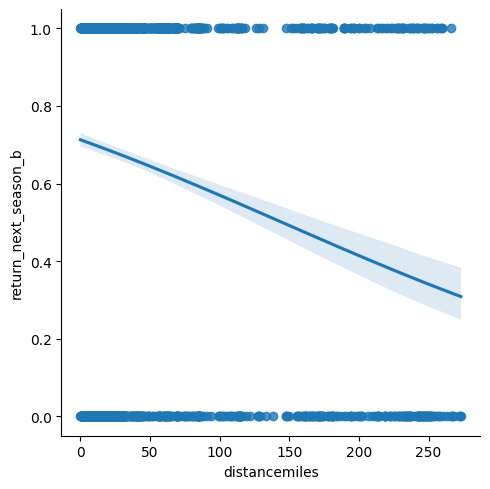

In [79]:
sns.lmplot(data = df_clean, x='distancemiles', y='return_next_season_b', logistic=True)

plt.show()

##### price_per_ticket and return_next_season_b (binary) logistic trent plot

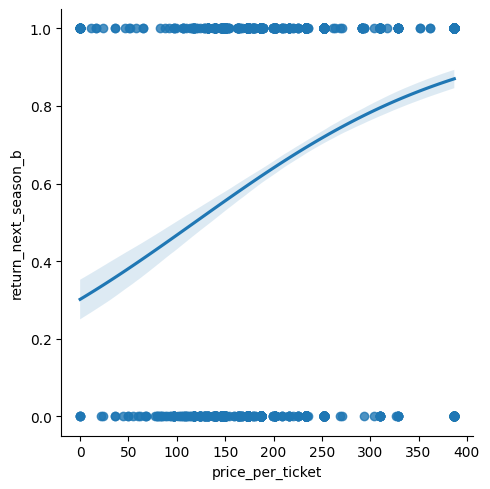

In [80]:
sns.lmplot(data = df_clean, x='price_per_ticket', y='return_next_season_b', logistic=True)

plt.show()

#### Model One - Continuous Inputs with Linear Additive Features

##### price_per_ticket + distancemiles 

In [81]:
fit_01 = smf.logit(formula='return_next_season_b ~ distancemiles + price_per_ticket', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.595201
         Iterations 5


In [82]:
fit_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3357
Method:                             MLE   Df Model:                            2
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                 0.06641
Time:                          00:22:24   Log-Likelihood:                -1999.9
converged:                         True   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                 1.647e-62
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5888      0.121     -4.869      0.000      -0.826      -0.352
distancemiles       -0.0059      0.001     -8.751      0.000      -0.007      -0.005
price_per_ticket     0.0069      0.001     12.807      0.000       0.006       0.008
====================================================================================
"""

In [83]:
fit_01.pvalues

Intercept           1.124289e-06
distancemiles       2.115066e-18
price_per_ticket    1.503083e-37
dtype: float64

In [84]:
fit_01.pvalues < 0.05

Intercept           True
distancemiles       True
price_per_ticket    True
dtype: bool

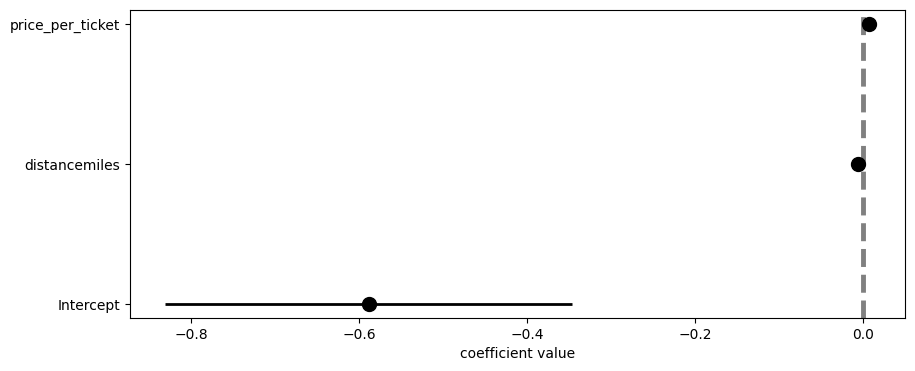

In [85]:
my_coefplot(fit_01)

##### Predict probability and class

In [86]:
df_clean_01 = df_clean.copy()

In [87]:
df_clean_01['pred_probability'] = fit_01.predict(df_clean)

In [88]:
df_clean_01['pred_class'] = np.where( df_clean_01.pred_probability > 0.5, 1, 0 )

In [89]:
df_clean_01

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.747287           1  
1             0.883972           1  
2             0.714009           1  
3             0.738398           1  
4             0.740896           1  
...                ...         ...  
3355          0.590975           1  
3356          0.667458           1  
3357          0.728628           1  
3358          0.717309           1  
3359          0.577491           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [90]:
confusion_matrix( df_clean_01.return_next_season_b.to_numpy(), df_clean_01.pred_class.to_numpy() )

array([[ 195,  930],
       [ 133, 2102]], dtype=int64)

In [91]:
TN, FP, FN, TP = confusion_matrix( df_clean_01.return_next_season_b.to_numpy(), df_clean_01.pred_class.to_numpy() ).ravel()

##### Accuracy

In [92]:
np.mean( df_clean_01.return_next_season_b == df_clean_01.pred_class )

0.6836309523809524

In [93]:
Accuracy_01 = (TN + TP) / (TN + TP + FN + FP)

In [94]:
Accuracy_01

0.6836309523809524

##### Sensitivity

In [95]:
Sensitivity_01 = TP / (TP + FN)

In [96]:
Sensitivity_01

0.9404921700223714

##### Specificity

In [97]:
Specificity_01 = TN / (TN + FP)

In [98]:
Specificity_01

0.17333333333333334

##### False Positive Rate

In [99]:
FPR_01 = 1 - Specificity_01

In [100]:
FPR_01

0.8266666666666667

#####  ROC Curve

In [101]:
fpr_01, tpr_01, threshold_01 = roc_curve( df_clean_01.return_next_season_b.to_numpy(), df_clean_01.pred_probability.to_numpy() )

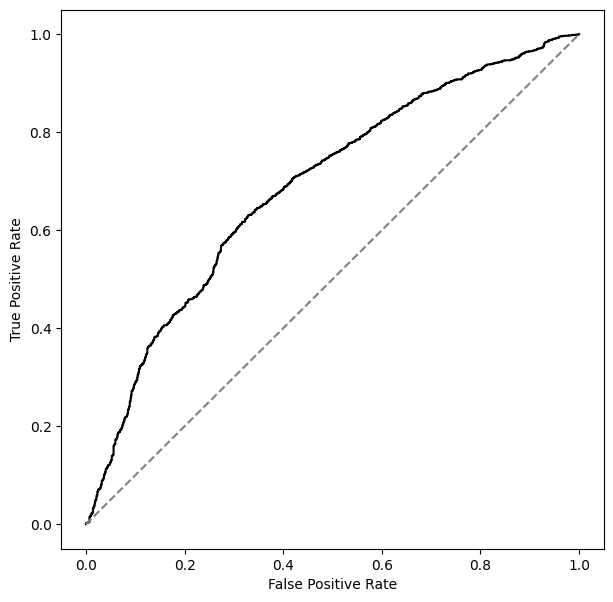

In [102]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_01, tpr_01, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [103]:
roc_auc_score( df_clean_01.return_next_season_b.to_numpy(), df_clean_01.pred_probability.to_numpy() )

0.687900770569227

Classification information:

Confusion Matrix - 
array([[ 195,  930],
       [ 133, 2102]], dtype=int64)

Accuracy - 0.684

Sensitivity -0.941

Specificity - 0.173

False Positive Rate - 0.826

ROC AUC Value - 0.688

Model One has three coefficients that are estimated (Intercept, distancemiles, and price_per_ticket). Each of these coefficients are statistically significant at a p-value of 0.05. Both the intercept and distancemiles are negative and this means that when distancemiles decreases, then the outcome variable (return_next_season) will also decrease. The price_per_ticket is positive so when there is an increase in return_next_season.

The coefficient price_per_ticket has the highest magnitude of 0.0069. distancemiles has a magnitude of 0.0059 and is the second highest.

#### Model Two: Catergorical Inputs with Linear Additive Features

##### lump_gender, bin_age, lump_ticket_count, purchase_month, purchase_dow, price_type, price_level

In [104]:
fit_02 = smf.logit(formula='return_next_season_b ~ lump_gender + bin_age + lump_ticket_count + purchase_month + purchase_dow + price_type + price_level', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.480239
         Iterations 7


In [105]:
fit_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3335
Method:                             MLE   Df Model:                           24
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                  0.2467
Time:                          00:22:25   Log-Likelihood:                -1613.6
converged:                         True   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                6.646e-208
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.2975      0.317     10.397      0.000       2.676       3.919
lump_gender[T.unknown]               -2.0028      0.218     -9.179      0.000      -2.430      -1.575
bin_age[T.B]                          0.6471      0.175      3.697      0.000       0.304       0.990
bin_age[T.Unknown]                   -0.6345      0.105     -6.036      0.000      -0.840      -0.428
lump_ticket_count[T.2]                0.0645      0.206      0.312      0.755      -0.340       0.469
lump_ticket_count[T.3]                0.3521      0.249      1.414      0.157      -0.136       0.840
lump_ticket_count[T.4]                0.2081      0.226      0.921      0.357      -0.235       0.651
lump_ticket_count[T.5 or more]        0.6486      0.250      2.590      0.010       0.158       1.139
purchase_month[T.Mar-Apr]            -0.5681      0.106     -5.378      0.000      -0.775      -0.361
purchase_month[T.Other]              -1.7590      0.175    -10.049      0.000      -2.102      -1.416
purchase_dow[T.Mon]                  -0.4062      0.138     -2.940      0.003      -0.677      -0.135
purchase_dow[T.Other]                -0.2874      0.163     -1.762      0.078      -0.607       0.032
purchase_dow[T.Thu]                  -0.0067      0.151     -0.045      0.964      -0.303       0.289
purchase_dow[T.Tue]                   0.2164      0.150      1.442      0.149      -0.078       0.511
purchase_dow[T.Wed]                   0.1448      0.150      0.963      0.336      -0.150       0.440
price_type[T.IA]                     -1.1969      0.124     -9.648      0.000      -1.440      -0.954
price_type[T.IA-2]                   -0.1874      0.147     -1.277      0.202      -0.475       0.100
price_type[T.Other]                  -0.3259      0.120     -2.724      0.006      -0.560      -0.091
price_level[T.Lower Panther Blue]     0.7844      0.245      3.201      0.001       0.304       1.265
price_level[T.Lower Panther Gold]     1.3905      0.311      4.470      0.000       0.781       2.000
price_level[T.Lower Panther Red]      0.6532      0.223      2.930      0.003       0.216       1.090
price_level[T.Lower Sideline]         0.4210      0.178      2.362      0.018       0.072       0.770
price_level[T.Other]                 -0.1797      0.115     -1.557      0.119      -0.406       0.046
price_level[T.Upper Corners]         -0.5410      0.148     -3.647      0.000      -0.832      -0.250
price_level[T.Upper Sideline]        -0.2859      0.193     -1.479      0.139      -0.665       0.093
=====================================================================================================
"""

In [106]:
fit_02.pvalues

Intercept                            2.565523e-25
lump_gender[T.unknown]               4.341492e-20
bin_age[T.B]                         2.185802e-04
bin_age[T.Unknown]                   1.575383e-09
lump_ticket_count[T.2]               7.548022e-01
lump_ticket_count[T.3]               1.574782e-01
lump_ticket_count[T.4]               3.572068e-01
lump_ticket_count[T.5 or more]       9.608526e-03
purchase_month[T.Mar-Apr]            7.542303e-08
purchase_month[T.Other]              9.271028e-24
purchase_dow[T.Mon]                  3.283515e-03
purchase_dow[T.Other]                7.814931e-02
purchase_dow[T.Thu]                  9.644790e-01
purchase_dow[T.Tue]                  1.493283e-01
purchase_dow[T.Wed]                  3.355799e-01
price_type[T.IA]                     5.018775e-22
price_type[T.IA-2]                   2.016348e-01
price_type[T.Other]                  6.454386e-03
price_level[T.Lower Panther Blue]    1.370792e-03
price_level[T.Lower Panther Gold]    7.804259e-06


In [107]:
fit_02.pvalues < 0.05

Intercept                             True
lump_gender[T.unknown]                True
bin_age[T.B]                          True
bin_age[T.Unknown]                    True
lump_ticket_count[T.2]               False
lump_ticket_count[T.3]               False
lump_ticket_count[T.4]               False
lump_ticket_count[T.5 or more]        True
purchase_month[T.Mar-Apr]             True
purchase_month[T.Other]               True
purchase_dow[T.Mon]                   True
purchase_dow[T.Other]                False
purchase_dow[T.Thu]                  False
purchase_dow[T.Tue]                  False
purchase_dow[T.Wed]                  False
price_type[T.IA]                      True
price_type[T.IA-2]                   False
price_type[T.Other]                   True
price_level[T.Lower Panther Blue]     True
price_level[T.Lower Panther Gold]     True
price_level[T.Lower Panther Red]      True
price_level[T.Lower Sideline]         True
price_level[T.Other]                 False
price_level

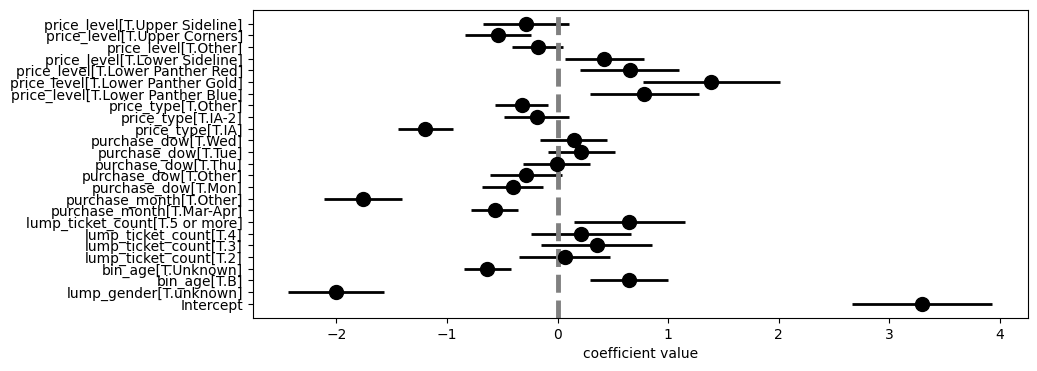

In [108]:
my_coefplot(fit_02)

##### Predict probability and class

In [109]:
df_clean_02 = df_clean.copy()

In [110]:
df_clean_02['pred_probability'] = fit_02.predict(df_clean)

In [111]:
df_clean_02['pred_class'] = np.where( df_clean_02.pred_probability > 0.5, 1, 0 )

In [112]:
df_clean_02

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.778912           1  
1             0.665919           1  
2             0.980886           1  
3             0.909629           1  
4             0.839423           1  
...                ...         ...  
3355          0.631405           1  
3356          0.804194           1  
3357          0.604435           1  
3358          0.805398           1  
3359          0.818169           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [113]:
confusion_matrix( df_clean_02.return_next_season_b.to_numpy(), df_clean_02.pred_class.to_numpy() )

array([[ 570,  555],
       [ 233, 2002]], dtype=int64)

In [114]:
TN, FP, FN, TP = confusion_matrix( df_clean_02.return_next_season_b.to_numpy(), df_clean_02.pred_class.to_numpy() ).ravel()

##### Accuracy

In [115]:
np.mean( df_clean_02.return_next_season_b == df_clean_02.pred_class )

0.7654761904761904

In [116]:
Accuracy_02 = (TN + TP) / (TN + TP + FN + FP)

In [117]:
Accuracy_02

0.7654761904761904

##### Sensitivity

In [118]:
Sensitivity_02 = TP / (TP + FN)

In [119]:
Sensitivity_02

0.8957494407158837

##### Specificity

In [120]:
Specificity_02 = TN / (TN + FP)

In [121]:
Specificity_02

0.5066666666666667

##### False Positive Rate

In [122]:
FPR_02 = 1 - Specificity_02

In [123]:
FPR_02

0.4933333333333333

#####  ROC Curve

In [124]:
fpr_02, tpr_02, threshold_02 = roc_curve( df_clean_02.return_next_season_b.to_numpy(), df_clean_02.pred_probability.to_numpy() )

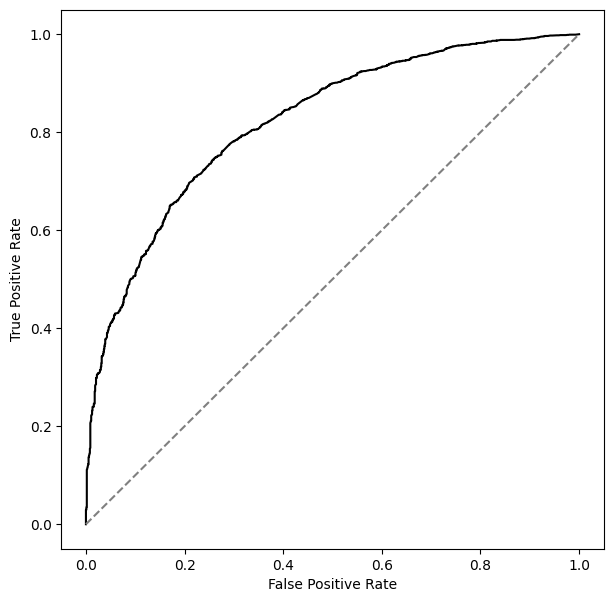

In [125]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_02, tpr_02, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [126]:
roc_auc_score( df_clean_02.return_next_season_b.to_numpy(), df_clean_02.pred_probability.to_numpy() )

0.8211318916231667

##### Classification information:

Confusion Matrix - 
array([[ 570,  555],
       [ 233, 2002]], dtype=int64)

Accuracy - 0.765

Sensitivity - 0.896

Specificity - 0.507

False Positive Rate - 0.493

ROC AUC Value - 0.821

##### Model Two has 25 coefficients that are estimated. There are 14 coefficients which are statistically significant at a p-value of 0.05. These coefficients are: 

Intercept

lump_gender[T.unknown]

bin_age[T.B]

bin_age[T.Unknown]

lump_ticket_count[T.5 or more]

purchase_month[T.Mar-Apr]

purchase_month[T.Other]

purchase_dow[T.Mon]

price_type[T.IA]

price_type[T.Other]

price_level[T.Lower Panther Blue]

price_level[T.Lower Panther Gold]

price_level[T.Lower Panther Red]

price_level[T.Lower Sideline]

##### From the 14 significant coefficients the following seven are positive and when they increase, the return_next_season will also increase: 

Intercept

bin_age[T.B]

lump_ticket_count[T.5 or more]

price_level[T.Lower Panther Blue]

price_level[T.Lower Panther Gold]

price_level[T.Lower Panther Red]

price_level[T.Lower Sideline]


##### The remaining 7 are negative and when they decrease so will the likely hood that return_next_season will decrease: 

lump_gender[T.unknown]

bin_age[T.Unknown]

purchase_month[T.Mar-Apr]

purchase_month[T.Other]

purchase_dow[T.Mon]

price_type[T.IA]

price_type[T.Other]

##### Magnitude
The coefficient lump_gender[T.unknown] has the highest magnitude of 2.0028. purchase_month[T.Other] has a magnitude of 1.7590 and is the second highest.

#### Model Three: Catergorical Inputs and Interactions with Linear Additive Features

##### lump_gender, bin_age, and lump_ticket_count interactions

In [127]:
fit_03 = smf.logit(formula='return_next_season_b ~ lump_gender * bin_age * lump_ticket_count', data=df_clean).fit()

         Current function value: 0.554855
         Iterations: 35


C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [128]:
fit_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3330
Method:                             MLE   Df Model:                           29
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                  0.1297
Time:                          00:22:26   Log-Likelihood:                -1864.3
converged:                        False   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                 9.803e-99
============================================================================================================================================
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    1.6094      0.632      2.545      0.011       0.370       2.849
lump_gender[T.unknown]                                                      -0.5978      0.755     -0.792      0.429      -2.078       0.882
bin_age[T.B]                                                                21.6811   6.59e+04      0.000      1.000   -1.29e+05    1.29e+05
bin_age[T.Unknown]                                                          12.8436    972.563      0.013      0.989   -1893.345    1919.032
lump_ticket_count[T.2]                                                       1.0090      0.690      1.461      0.144      -0.344       2.362
lump_ticket_count[T.3]                                                      18.2637   3398.611      0.005      0.996   -6642.892    6679.420
lump_ticket_count[T.4]                                                       2.5650      1.190      2.156      0.031       0.233       4.897
lump_ticket_count[T.5 or more]                                               1.8246      1.197      1.525      0.127      -0.521       4.170
lump_gender[T.unknown]:bin_age[T.B]                                        -21.7119   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
lump_gender[T.unknown]:bin_age[T.Unknown]                                  -13.9006    972.563     -0.014      0.989   -1920.089    1892.288
lump_gender[T.unknown]:lump_ticket_count[T.2]                               -1.1745      0.812     -1.447      0.148      -2.765       0.416
lump_gender[T.unknown]:lump_ticket_count[T.3]                              -18.4486   3398.612     -0.005      0.996   -6679.605    6642.707
lump_gender[T.unknown]:lump_ticket_count[T.4]                               -2.6304      1.276     -2.062      0.039      -5.131      -0.130
lump_gender[T.unknown]:lump_ticket_count[T.5 or more]                       -2.0058      1.299     -1.544      0.123      -4.552       0.540
bin_age[T.B]:lump_ticket_count[T.2]                                        -21.0806   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
bin_age[T.Unknown]:lump_ticket_count[T.2]                                  -12.8230    972.563     -0.013      0.989   -1919.012    1893.366
bin_age[T.B]:lump_ticket_count[T.3]                                        -21.5418   6.62e+04     -0.000      1.000    -1.3e+05     1.3e+05
bin_age[T.Unknown]:lump_ticket_count[T.3]                                  -27.4713   3535.039     -0.008      0.994   -6956.021    6901.078
bin_age[T.B]:lump_ticket_count[T.4]                                        -23.2652   6.59e+04     -0.000      1.000   -1.29e+05    1.29e+05
bin_age[T.Unknown]:lump_ticket_count[T.4]                                    4.6606   2.08e+04      0.000      1.000   -4

In [129]:
fit_03.pvalues

Intercept                                                                   0.010936
lump_gender[T.unknown]                                                      0.428631
bin_age[T.B]                                                                0.999738
bin_age[T.Unknown]                                                          0.989464
lump_ticket_count[T.2]                                                      0.143879
lump_ticket_count[T.3]                                                      0.995712
lump_ticket_count[T.4]                                                      0.031086
lump_ticket_count[T.5 or more]                                              0.127368
lump_gender[T.unknown]:bin_age[T.B]                                         0.999737
lump_gender[T.unknown]:bin_age[T.Unknown]                                   0.988596
lump_gender[T.unknown]:lump_ticket_count[T.2]                               0.147848
lump_gender[T.unknown]:lump_ticket_count[T.3]                    

In [130]:
fit_03.pvalues < 0.05

Intercept                                                                    True
lump_gender[T.unknown]                                                      False
bin_age[T.B]                                                                False
bin_age[T.Unknown]                                                          False
lump_ticket_count[T.2]                                                      False
lump_ticket_count[T.3]                                                      False
lump_ticket_count[T.4]                                                       True
lump_ticket_count[T.5 or more]                                              False
lump_gender[T.unknown]:bin_age[T.B]                                         False
lump_gender[T.unknown]:bin_age[T.Unknown]                                   False
lump_gender[T.unknown]:lump_ticket_count[T.2]                               False
lump_gender[T.unknown]:lump_ticket_count[T.3]                               False
lump_gender[T.un

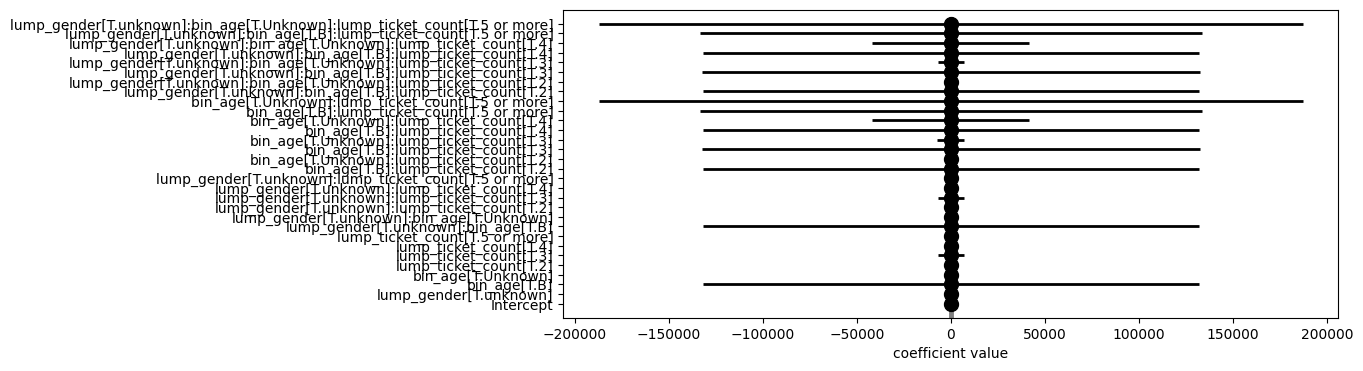

In [131]:
my_coefplot(fit_03)

##### Predict probability and class

In [132]:
df_clean_03 = df_clean.copy()

In [133]:
df_clean_03['pred_probability'] = fit_03.predict(df_clean)

In [134]:
df_clean_03['pred_class'] = np.where( df_clean_03.pred_probability > 0.5, 1, 0 )

In [135]:
df_clean_03

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.522876           1  
1             0.496756           0  
2             0.961538           1  
3             0.696429           1  
4             0.496756           0  
...                ...         ...  
3355          0.496756           0  
3356          0.825397           1  
3357          0.699758           1  
3358          0.825397           1  
3359          0.699758           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [136]:
confusion_matrix( df_clean_03.return_next_season_b.to_numpy(), df_clean_03.pred_class.to_numpy() )

array([[ 588,  537],
       [ 579, 1656]], dtype=int64)

In [137]:
TN, FP, FN, TP = confusion_matrix( df_clean_03.return_next_season_b.to_numpy(), df_clean_03.pred_class.to_numpy() ).ravel()

##### Accuracy

In [138]:
np.mean( df_clean_03.return_next_season_b == df_clean_03.pred_class )

0.6678571428571428

In [139]:
Accuracy_03 = (TN + TP) / (TN + TP + FN + FP)

In [140]:
Accuracy_03

0.6678571428571428

##### Sensitivity

In [141]:
Sensitivity_03 = TP / (TP + FN)

In [142]:
Sensitivity_03

0.7409395973154362

##### Specificity

In [143]:
Specificity_03 = TN / (TN + FP)

In [144]:
Specificity_03

0.5226666666666666

##### False Positive Rate

In [145]:
FPR_03 = 1 - Specificity_03

In [146]:
FPR_03

0.4773333333333334

#####  ROC Curve

In [147]:
fpr_03, tpr_03, threshold_03 = roc_curve( df_clean_03.return_next_season_b.to_numpy(), df_clean_03.pred_probability.to_numpy() )

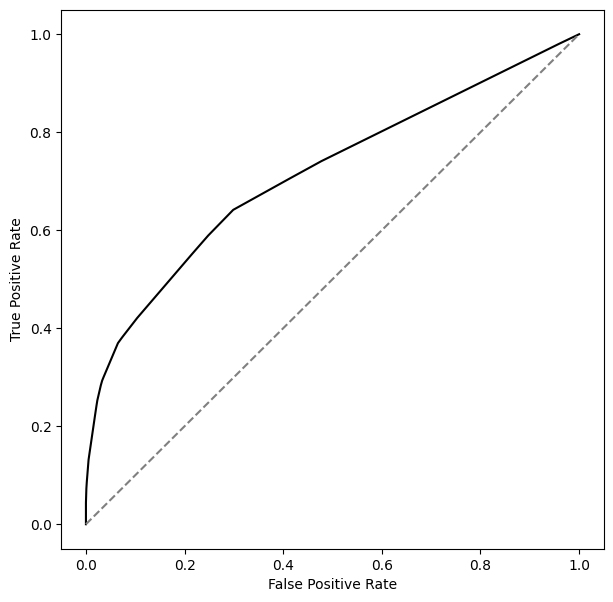

In [148]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_03, tpr_03, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [149]:
roc_auc_score( df_clean_03.return_next_season_b.to_numpy(), df_clean_03.pred_probability.to_numpy() )

0.7153101665423813

##### Classification information:

Confusion Matrix - 
array([[ 588,  537],
       [ 579, 1656]], dtype=int64)

Accuracy - 0.668

Sensitivity - 0.741

Specificity - 0.523

False Positive Rate - 0.477

ROC AUC Value - 0.715

##### Model Three has 29 coefficients that are estimated. There are only two coefficients which are statistically significant at a p-value of 0.05. These coefficients are: 

Intercept

lump_ticket_count[T.4]

##### Both of the coefficiants are positive and when they increase, the return_next_season will also increase: 

Intercept

lump_ticket_count[T.4]

##### Magnitude
The coefficient lump_ticket_count[T.4] has the highest magnitude of 2.565. And Intercept has a magnitude of 1.609 and is the second highest.

#### Model 4: All Inputs (continuous and categorical) with linear additive features

In [150]:
fit_04 = smf.logit(formula='return_next_season_b ~ distancemiles + price_per_ticket + lump_gender + purchase_month + purchase_dow + price_type + price_level', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.475858
         Iterations 7


In [151]:
fit_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3339
Method:                             MLE   Df Model:                           20
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                  0.2536
Time:                          00:22:27   Log-Likelihood:                -1598.9
converged:                         True   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                1.348e-217
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             2.4558      0.276      8.909      0.000       1.916       2.996
lump_gender[T.unknown]               -2.3270      0.212    -10.970      0.000      -2.743      -1.911
purchase_month[T.Mar-Apr]            -0.6024      0.107     -5.655      0.000      -0.811      -0.394
purchase_month[T.Other]              -1.8594      0.175    -10.642      0.000      -2.202      -1.517
purchase_dow[T.Mon]                  -0.3419      0.140     -2.449      0.014      -0.616      -0.068
purchase_dow[T.Other]                -0.1726      0.163     -1.057      0.291      -0.493       0.148
purchase_dow[T.Thu]                   0.0310      0.152      0.204      0.838      -0.267       0.329
purchase_dow[T.Tue]                   0.2525      0.151      1.669      0.095      -0.044       0.549
purchase_dow[T.Wed]                   0.3787      0.152      2.487      0.013       0.080       0.677
price_type[T.IA]                     -1.2253      0.127     -9.686      0.000      -1.473      -0.977
price_type[T.IA-2]                   -0.3914      0.148     -2.637      0.008      -0.682      -0.100
price_type[T.Other]                  -0.2170      0.120     -1.803      0.071      -0.453       0.019
price_level[T.Lower Panther Blue]     0.5013      0.248      2.024      0.043       0.016       0.987
price_level[T.Lower Panther Gold]     1.1527      0.314      3.677      0.000       0.538       1.767
price_level[T.Lower Panther Red]      0.3818      0.225      1.700      0.089      -0.058       0.822
price_level[T.Lower Sideline]         0.0855      0.181      0.472      0.637      -0.270       0.441
price_level[T.Other]                 -0.5288      0.123     -4.295      0.000      -0.770      -0.287
price_level[T.Upper Corners]         -0.5137      0.148     -3.479      0.001      -0.803      -0.224
price_level[T.Upper Sideline]        -0.5586      0.193     -2.899      0.004      -0.936      -0.181
distancemiles                        -0.0043      0.001     -5.375      0.000      -0.006      -0.003
price_per_ticket                      0.0059      0.001      9.670      0.000       0.005       0.007
=====================================================================================================
"""

In [152]:
fit_04.pvalues

Intercept                            5.143604e-19
lump_gender[T.unknown]               5.322945e-28
purchase_month[T.Mar-Apr]            1.556767e-08
purchase_month[T.Other]              1.909502e-26
purchase_dow[T.Mon]                  1.433417e-02
purchase_dow[T.Other]                2.906034e-01
purchase_dow[T.Thu]                  8.382624e-01
purchase_dow[T.Tue]                  9.507031e-02
purchase_dow[T.Wed]                  1.286718e-02
price_type[T.IA]                     3.456553e-22
price_type[T.IA-2]                   8.367977e-03
price_type[T.Other]                  7.131882e-02
price_level[T.Lower Panther Blue]    4.293172e-02
price_level[T.Lower Panther Gold]    2.362705e-04
price_level[T.Lower Panther Red]     8.913211e-02
price_level[T.Lower Sideline]        6.369194e-01
price_level[T.Other]                 1.749228e-05
price_level[T.Upper Corners]         5.026426e-04
price_level[T.Upper Sideline]        3.739127e-03
distancemiles                        7.647353e-08


In [153]:
fit_04.pvalues < 0.05

Intercept                             True
lump_gender[T.unknown]                True
purchase_month[T.Mar-Apr]             True
purchase_month[T.Other]               True
purchase_dow[T.Mon]                   True
purchase_dow[T.Other]                False
purchase_dow[T.Thu]                  False
purchase_dow[T.Tue]                  False
purchase_dow[T.Wed]                   True
price_type[T.IA]                      True
price_type[T.IA-2]                    True
price_type[T.Other]                  False
price_level[T.Lower Panther Blue]     True
price_level[T.Lower Panther Gold]     True
price_level[T.Lower Panther Red]     False
price_level[T.Lower Sideline]        False
price_level[T.Other]                  True
price_level[T.Upper Corners]          True
price_level[T.Upper Sideline]         True
distancemiles                         True
price_per_ticket                      True
dtype: bool

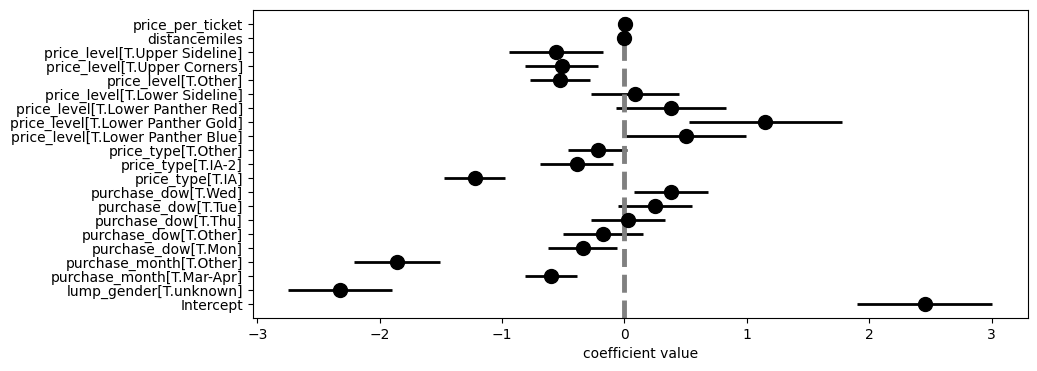

In [154]:
my_coefplot(fit_04)

##### Predict probability and class

In [155]:
df_clean_04 = df_clean.copy()

In [156]:
df_clean_04['pred_probability'] = fit_04.predict(df_clean)

In [157]:
df_clean_04['pred_class'] = np.where( df_clean_04.pred_probability > 0.5, 1, 0 )

In [158]:
df_clean_04

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.834848           1  
1             0.904164           1  
2             0.971000           1  
3             0.852698           1  
4             0.919536           1  
...                ...         ...  
3355          0.613957           1  
3356          0.623566           1  
3357          0.492732           0  
3358          0.641485           1  
3359          0.792182           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [159]:
confusion_matrix( df_clean_04.return_next_season_b.to_numpy(), df_clean_04.pred_class.to_numpy() )

array([[ 600,  525],
       [ 245, 1990]], dtype=int64)

In [160]:
TN, FP, FN, TP = confusion_matrix( df_clean_04.return_next_season_b.to_numpy(), df_clean_04.pred_class.to_numpy() ).ravel()

##### Accuracy

In [161]:
np.mean( df_clean_04.return_next_season_b == df_clean_04.pred_class )

0.7708333333333334

In [162]:
Accuracy_04 = (TN + TP) / (TN + TP + FN + FP)

In [163]:
Accuracy_04

0.7708333333333334

##### Sensitivity

In [164]:
Sensitivity_04 = TP / (TP + FN)

In [165]:
Sensitivity_04

0.8903803131991052

##### Specificity

In [166]:
Specificity_04 = TN / (TN + FP)

In [167]:
Specificity_04

0.5333333333333333

##### False Positive Rate

In [168]:
FPR_04 = 1 - Specificity_04

In [169]:
FPR_04

0.4666666666666667

#####  ROC Curve

In [170]:
fpr_04, tpr_04, threshold_04 = roc_curve( df_clean_04.return_next_season_b.to_numpy(), df_clean_04.pred_probability.to_numpy() )

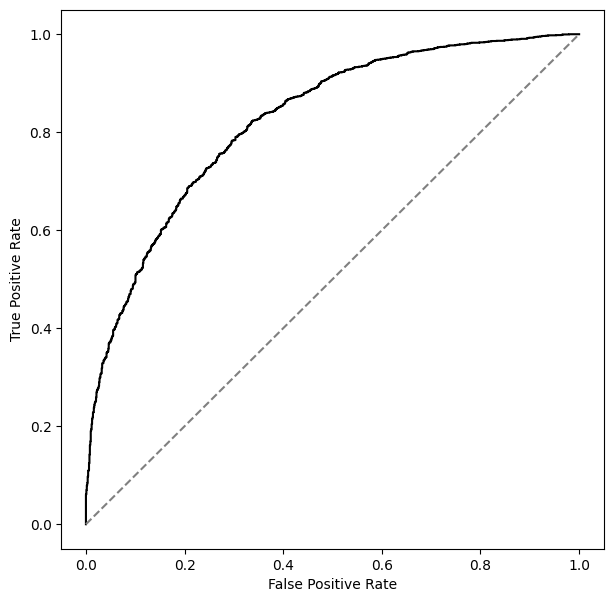

In [171]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_04, tpr_04, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [172]:
roc_auc_score( df_clean_04.return_next_season_b.to_numpy(), df_clean_04.pred_probability.to_numpy() )

0.8233073825503356

##### Classification information:

Confusion Matrix - 
array([[ 600,  525],
       [ 245, 1990]], dtype=int64)

Accuracy - 0.771

Sensitivity - 0.890

Specificity - 0.533

False Positive Rate - 0.467

ROC AUC Value - 0.823

##### Model Four has 20 coefficients that are estimated. There are 14 coefficients which are statistically significant at a p-value of 0.05. These coefficients are: 

Intercept

lump_gender[T.unknown]

purchase_month[T.Mar-Apr]

purchase_month[T.Other]

purchase_dow[T.Mon]

purchase_dow[T.Wed]

price_type[T.IA]

price_type[T.IA-2]

price_level[T.Lower Panther Blue]

price_level[T.Lower Panther Gold]

price_level[T.Other]

price_level[T.Upper Corners]

price_level[T.Upper Sideline]

distancemiles

price_per_ticket

##### From the 14 significant coefficients the following seven are positive and when they increase, the return_next_season will also increase: 

Intercept

purchase_dow[T.Wed]

price_level[T.Lower Panther Blue]

price_level[T.Lower Panther Gold]

price_per_ticket

##### The remaining 9 are negative and when they decrease so will the likely hood that return_next_season will decrease: 

lump_gender[T.unknown]

purchase_month[T.Mar-Apr]

purchase_month[T.Other]

purchase_dow[T.Mon]

price_type[T.IA]

price_type[T.IA-2]

price_level[T.Other]

price_level[T.Upper Corners]

price_level[T.Upper Sideline]

distancemiles

##### Magnitude
The coefficient intercept has the highest magnitude of 2.4558. lump_gender[T.unknown] has a magnitude of 2.327 and is the second highest.

#### Model Five: No INPUTS! Fit an INTERCEPT-ONLY or CONSTANT AVERAGE

In [173]:
fit_05 = smf.logit(formula='return_next_season_b ~ 1', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.637541
         Iterations 4


In [174]:
fit_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3359
Method:                             MLE   Df Model:                            0
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:               7.479e-11
Time:                          00:22:28   Log-Likelihood:                -2142.1
converged:                         True   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6865      0.037     18.778      0.000       0.615       0.758
==============================================================================
"""

In [175]:
fit_05.pvalues

Intercept    1.133650e-78
dtype: float64

In [176]:
fit_05.pvalues < 0.05

Intercept    True
dtype: bool

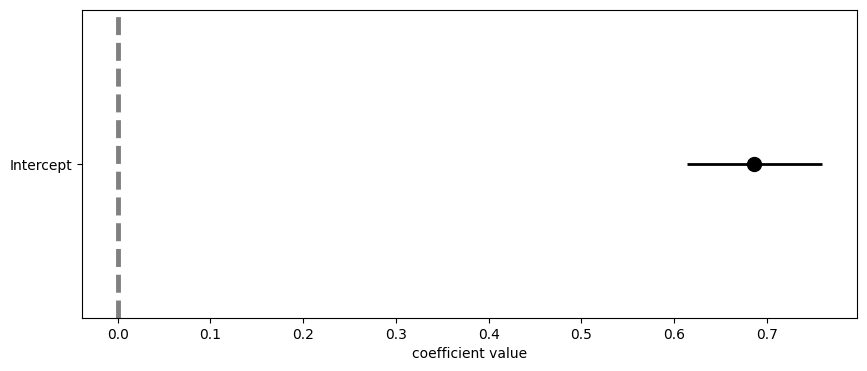

In [177]:
my_coefplot(fit_05)

##### Predict probability and class

In [178]:
df_clean_05 = df_clean.copy()

In [179]:
df_clean_05['pred_probability'] = fit_05.predict(df_clean)

In [180]:
df_clean_05['pred_class'] = np.where( df_clean_05.pred_probability > 0.5, 1, 0 )

In [181]:
df_clean_05

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.665179           1  
1             0.665179           1  
2             0.665179           1  
3             0.665179           1  
4             0.665179           1  
...                ...         ...  
3355          0.665179           1  
3356          0.665179           1  
3357          0.665179           1  
3358          0.665179           1  
3359          0.665179           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [182]:
confusion_matrix( df_clean_05.return_next_season_b.to_numpy(), df_clean_05.pred_class.to_numpy() )

array([[   0, 1125],
       [   0, 2235]], dtype=int64)

In [183]:
TN, FP, FN, TP = confusion_matrix( df_clean_05.return_next_season_b.to_numpy(), df_clean_05.pred_class.to_numpy() ).ravel()

##### Accuracy

In [184]:
np.mean( df_clean_05.return_next_season_b == df_clean_05.pred_class )

0.6651785714285714

In [185]:
Accuracy_05 = (TN + TP) / (TN + TP + FN + FP)

In [186]:
Accuracy_05

0.6651785714285714

##### Sensitivity

In [187]:
Sensitivity_05 = TP / (TP + FN)

In [188]:
Sensitivity_05

1.0

##### Specificity

In [189]:
Specificity_05 = TN / (TN + FP)

In [190]:
Specificity_05

0.0

##### False Positive Rate

In [191]:
FPR_05 = 1 - Specificity_05

In [192]:
FPR_05

1.0

#####  ROC Curve

In [193]:
fpr_05, tpr_05, threshold_05 = roc_curve( df_clean_05.return_next_season_b.to_numpy(), df_clean_05.pred_probability.to_numpy() )

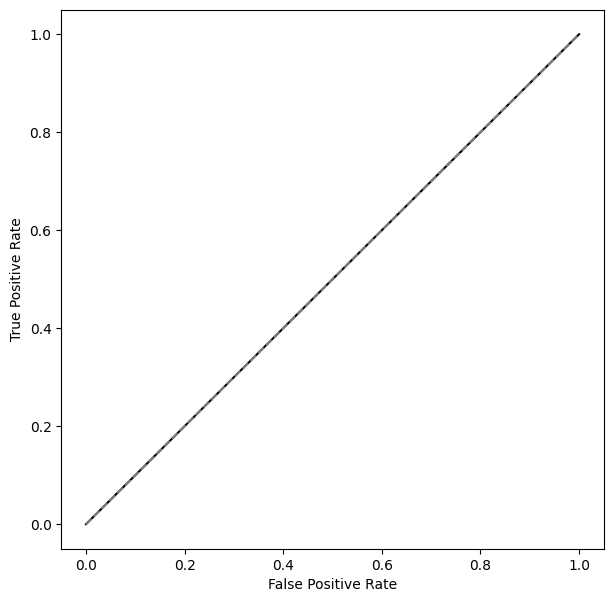

In [194]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_05, tpr_05, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [195]:
roc_auc_score( df_clean_05.return_next_season_b.to_numpy(), df_clean_05.pred_probability.to_numpy() )

0.5

##### Classification information:

Confusion Matrix - 
array([[   0, 1125],
       [   0, 2235]], dtype=int64)

Accuracy - 0.665

Sensitivity - 1.0

Specificity - 0.0

False Positive Rate -1.0

ROC AUC Value - 0.5

##### Model Five has only one coefficients that was estimated .

The Intercept is considered significant.

##### The Intercept is positive and when they increase, the return_next_season will also increase

##### Magnitude
The coefficient intercept has the highest magnitude of 0.687

#### Model Six: Continuous inputs with linear main effect and pair-wise interactions

In [196]:
fit_06 = smf.logit(formula='return_next_season_b ~ distancemiles * price_per_ticket', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.594163
         Iterations 5


In [197]:
fit_06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3356
Method:                             MLE   Df Model:                            3
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                 0.06804
Time:                          00:22:28   Log-Likelihood:                -1996.4
converged:                         True   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                 6.888e-63
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.4119      0.138     -2.995      0.003      -0.681      -0.142
distancemiles                     -0.0116      0.002     -4.883      0.000      -0.016      -0.007
price_per_ticket                   0.0060      0.001      9.668      0.000       0.005       0.007
distancemiles:price_per_ticket  2.793e-05   1.12e-05      2.495      0.013    5.99e-06    4.99e-05
==================================================================================================
"""

In [198]:
fit_06.pvalues

Intercept                         2.746492e-03
distancemiles                     1.043839e-06
price_per_ticket                  4.121634e-22
distancemiles:price_per_ticket    1.260441e-02
dtype: float64

In [199]:
fit_06.pvalues < 0.05

Intercept                         True
distancemiles                     True
price_per_ticket                  True
distancemiles:price_per_ticket    True
dtype: bool

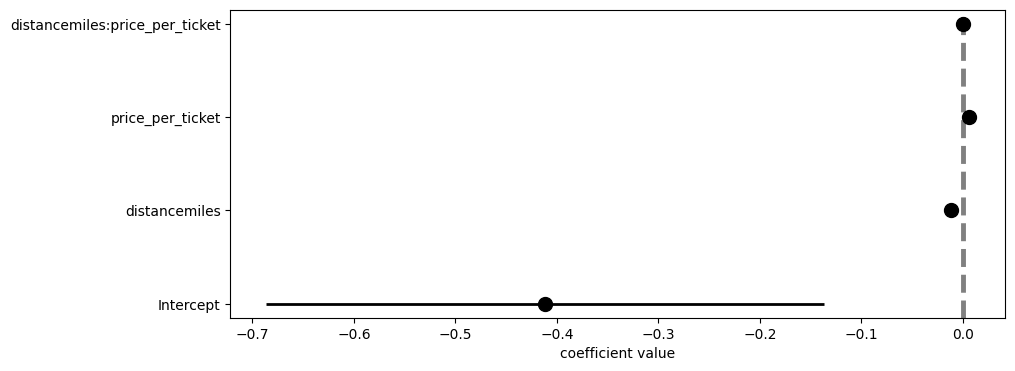

In [200]:
my_coefplot(fit_06)

##### Predict probability and class

In [201]:
df_clean_06 = df_clean.copy()

In [202]:
df_clean_06['pred_probability'] = fit_06.predict(df_clean)

In [203]:
df_clean_06['pred_class'] = np.where( df_clean_06.pred_probability > 0.5, 1, 0 )

In [204]:
df_clean_06

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.742302           1  
1             0.871560           1  
2             0.716515           1  
3             0.735367           1  
4             0.737312           1  
...                ...         ...  
3355          0.599357           1  
3356          0.670797           1  
3357          0.724646           1  
3358          0.714873           1  
3359          0.573751           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [205]:
confusion_matrix( df_clean_06.return_next_season_b.to_numpy(), df_clean_06.pred_class.to_numpy() )

array([[ 197,  928],
       [ 125, 2110]], dtype=int64)

In [206]:
TN, FP, FN, TP = confusion_matrix( df_clean_06.return_next_season_b.to_numpy(), df_clean_06.pred_class.to_numpy() ).ravel()

##### Accuracy

In [207]:
np.mean( df_clean_06.return_next_season_b == df_clean_06.pred_class )

0.6866071428571429

In [208]:
Accuracy_06 = (TN + TP) / (TN + TP + FN + FP)

In [209]:
Accuracy_06

0.6866071428571429

##### Sensitivity

In [210]:
Sensitivity_06 = TP / (TP + FN)

In [211]:
Sensitivity_06

0.9440715883668904

##### Specificity

In [212]:
Specificity_06 = TN / (TN + FP)

In [213]:
Specificity_06

0.1751111111111111

##### False Positive Rate

In [214]:
FPR_06 = 1 - Specificity_06

In [215]:
FPR_06

0.8248888888888889

#####  ROC Curve

In [216]:
fpr_06, tpr_06, threshold_06 = roc_curve( df_clean_06.return_next_season_b.to_numpy(), df_clean_06.pred_probability.to_numpy() )

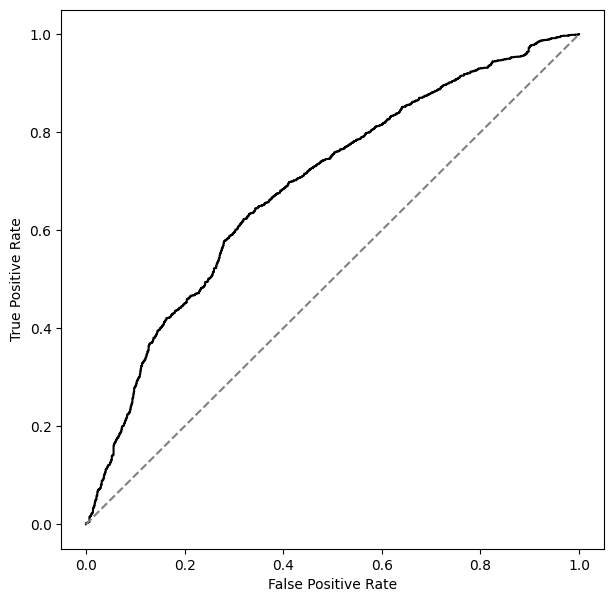

In [217]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_06, tpr_06, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [218]:
roc_auc_score( df_clean_06.return_next_season_b.to_numpy(), df_clean_06.pred_probability.to_numpy() )

0.6879095202585135

##### Classification information:

Confusion Matrix - 
array([[ 197,  928],
       [ 125, 2110]], dtype=int64)

Accuracy - 0.687

Sensitivity - 0.944

Specificity - 0.175

False Positive Rate - 0.825

ROC AUC Value - 0.688

##### Model Six has 4 coefficients that are estimated, all of which are statistically significant at a p-value of 0.05. These coefficients are: 

Intercept

distancemiles

price_per_ticket

distancemiles:price_per_ticket

##### From the 4 significant coefficients the following two are positive and when they increase, the return_next_season will also increase: 

price_per_ticket

distancemiles:price_per_ticket

##### The remaining two are negative and when they decrease so will the likely hood that return_next_season will decrease: 

Intercept

distancemiles

##### Magnitude
The coefficient distancemiles:price_per_ticket has the highest magnitude of 2.793e-05. price_per_ticket has a magnitude of 0.006 and is the second highest.

#### Models Seven - Nine: Interact the categorical inputs with the continuous inputs.

##### Model Seven: price_type * price_per_ticket

In [219]:
fit_07 = smf.logit(formula='return_next_season_b ~ price_type * price_per_ticket', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.561397
         Iterations 6


In [220]:
fit_07.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3352
Method:                             MLE   Df Model:                            7
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                  0.1194
Time:                          00:22:29   Log-Likelihood:                -1886.3
converged:                         True   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                2.467e-106
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.4502      0.162     -2.785      0.005      -0.767      -0.133
price_type[T.IA]                        -2.2084      0.351     -6.287      0.000      -2.897      -1.520
price_type[T.IA-2]                       0.2633      0.412      0.639      0.523      -0.544       1.070
price_type[T.Other]                     -0.0445      0.345     -0.129      0.897      -0.720       0.631
price_per_ticket                         0.0070      0.001      9.715      0.000       0.006       0.008
price_type[T.IA]:price_per_ticket        0.0019      0.002      1.219      0.223      -0.001       0.005
price_type[T.IA-2]:price_per_ticket     -0.0024      0.002     -1.368      0.171      -0.006       0.001
price_type[T.Other]:price_per_ticket    -0.0006      0.002     -0.366      0.715      -0.004       0.003
========================================================================================================
"""

In [221]:
fit_07.pvalues

Intercept                               5.354338e-03
price_type[T.IA]                        3.242893e-10
price_type[T.IA-2]                      5.225673e-01
price_type[T.Other]                     8.972307e-01
price_per_ticket                        2.613132e-22
price_type[T.IA]:price_per_ticket       2.227224e-01
price_type[T.IA-2]:price_per_ticket     1.712332e-01
price_type[T.Other]:price_per_ticket    7.145064e-01
dtype: float64

In [222]:
fit_07.pvalues < 0.05

Intercept                                True
price_type[T.IA]                         True
price_type[T.IA-2]                      False
price_type[T.Other]                     False
price_per_ticket                         True
price_type[T.IA]:price_per_ticket       False
price_type[T.IA-2]:price_per_ticket     False
price_type[T.Other]:price_per_ticket    False
dtype: bool

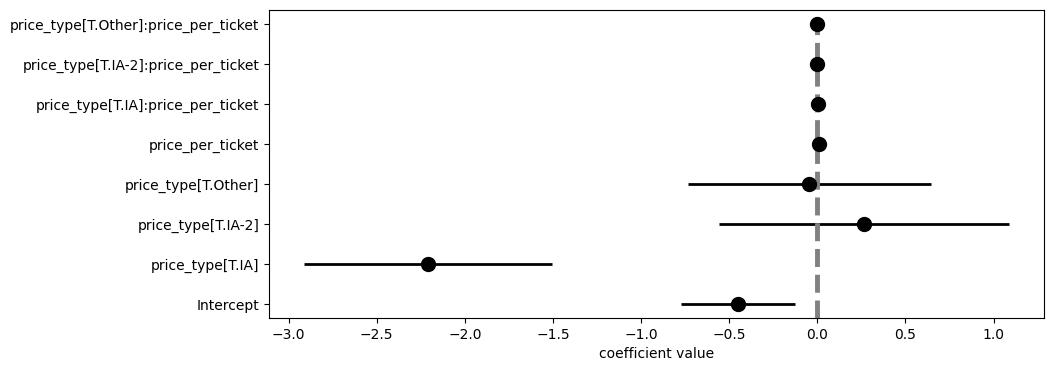

In [223]:
my_coefplot(fit_07)

##### Predict probability and class

In [224]:
df_clean_07 = df_clean.copy()

In [225]:
df_clean_07['pred_probability'] = fit_07.predict(df_clean)

In [226]:
df_clean_07['pred_class'] = np.where( df_clean_07.pred_probability > 0.5, 1, 0 )

In [227]:
df_clean_07

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.789068           1  
1             0.906129           1  
2             0.789068           1  
3             0.789068           1  
4             0.789068           1  
...                ...         ...  
3355          0.641535           1  
3356          0.663577           1  
3357          0.710327           1  
3358          0.767264           1  
3359          0.703267           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [228]:
confusion_matrix( df_clean_07.return_next_season_b.to_numpy(), df_clean_07.pred_class.to_numpy() )

array([[ 354,  771],
       [ 177, 2058]], dtype=int64)

In [229]:
TN, FP, FN, TP = confusion_matrix( df_clean_07.return_next_season_b.to_numpy(), df_clean_07.pred_class.to_numpy() ).ravel()

##### Accuracy

In [230]:
np.mean( df_clean_07.return_next_season_b == df_clean_07.pred_class )

0.7178571428571429

In [231]:
Accuracy_07 = (TN + TP) / (TN + TP + FN + FP)

In [232]:
Accuracy_07

0.7178571428571429

##### Sensitivity

In [233]:
Sensitivity_07 = TP / (TP + FN)

In [234]:
Sensitivity_07

0.9208053691275168

##### Specificity

In [235]:
Specificity_07 = TN / (TN + FP)

In [236]:
Specificity_07

0.31466666666666665

##### False Positive Rate

In [237]:
FPR_07 = 1 - Specificity_07

In [238]:
FPR_07

0.6853333333333333

#####  ROC Curve

In [239]:
fpr_07, tpr_07, threshold_07 = roc_curve( df_clean_07.return_next_season_b.to_numpy(), df_clean_07.pred_probability.to_numpy() )

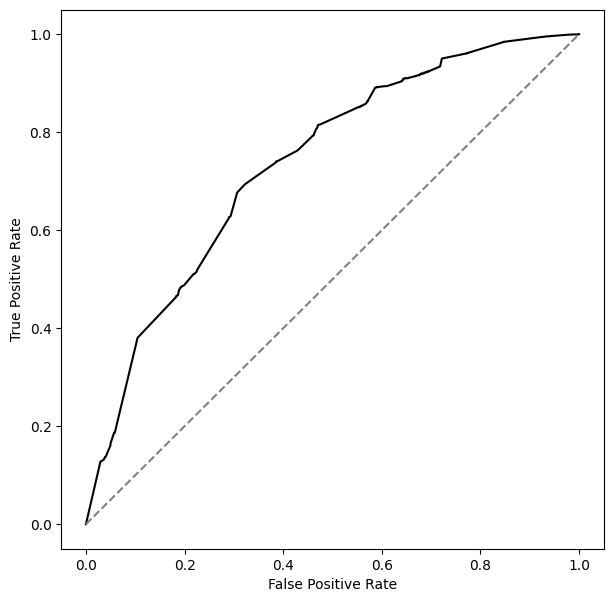

In [240]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_07, tpr_07, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [241]:
roc_auc_score( df_clean_07.return_next_season_b.to_numpy(), df_clean_07.pred_probability.to_numpy() )

0.7361209047974149

##### Classification information:

Confusion Matrix - 
array([[ 354,  771],
       [ 177, 2058]], dtype=int64)

Accuracy - 0.718

Sensitivity - 0.921

Specificity - 0.315

False Positive Rate - 0.685

ROC AUC Value - 0.736

##### Model Seven has 8 coefficients that are estimated, of which there are 2 statistically significant at a p-value of 0.05. These coefficients are: 

price_type[T.IA]

price_per_ticket

##### From the 2 significant coefficients price_per_ticket is positive and when they increase, the return_next_season will also increase

##### price_type[T.IA] is negative and when it decreases so will the likely hood that return_next_season will decrease

##### Magnitude
The coefficient price_type[T.IA] has the highest magnitude of 2.2084. price_per_ticket has a magnitude of 0.007 and is the second highest.

##### Model Eight: lump_ticket_count * price_per_ticket

In [242]:
fit_08 = smf.logit(formula='return_next_season_b ~ lump_ticket_count * price_per_ticket', data=df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.598928
         Iterations 6


In [243]:
fit_08.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3350
Method:                             MLE   Df Model:                            9
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                 0.06056
Time:                          00:22:30   Log-Likelihood:                -2012.4
converged:                         True   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                 9.940e-51
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -1.5630      0.588     -2.657      0.008      -2.716      -0.410
lump_ticket_count[T.2]                              0.4601      0.610      0.755      0.451      -0.735       1.655
lump_ticket_count[T.3]                              0.6202      0.755      0.822      0.411      -0.859       2.099
lump_ticket_count[T.4]                              0.0413      0.673      0.061      0.951      -1.278       1.361
lump_ticket_count[T.5 or more]                      2.1729      0.647      3.361      0.001       0.906       3.440
price_per_ticket                                    0.0093      0.003      3.446      0.001       0.004       0.015
lump_ticket_count[T.2]:price_per_ticket            -0.0015      0.003     -0.538      0.591      -0.007       0.004
lump_ticket_count[T.3]:price_per_ticket            -0.0013      0.004     -0.359      0.720      -0.008       0.006
lump_ticket_count[T.4]:price_per_ticket             0.0012      0.003      0.385      0.700      -0.005       0.007
lump_ticket_count[T.5 or more]:price_per_ticket    -0.0066      0.003     -2.213      0.027      -0.012      -0.001
===================================================================================================================
"""

In [244]:
fit_08.pvalues

Intercept                                          0.007876
lump_ticket_count[T.2]                             0.450543
lump_ticket_count[T.3]                             0.411168
lump_ticket_count[T.4]                             0.951141
lump_ticket_count[T.5 or more]                     0.000777
price_per_ticket                                   0.000569
lump_ticket_count[T.2]:price_per_ticket            0.590753
lump_ticket_count[T.3]:price_per_ticket            0.719823
lump_ticket_count[T.4]:price_per_ticket            0.700234
lump_ticket_count[T.5 or more]:price_per_ticket    0.026910
dtype: float64

In [245]:
fit_08.pvalues < 0.05

Intercept                                           True
lump_ticket_count[T.2]                             False
lump_ticket_count[T.3]                             False
lump_ticket_count[T.4]                             False
lump_ticket_count[T.5 or more]                      True
price_per_ticket                                    True
lump_ticket_count[T.2]:price_per_ticket            False
lump_ticket_count[T.3]:price_per_ticket            False
lump_ticket_count[T.4]:price_per_ticket            False
lump_ticket_count[T.5 or more]:price_per_ticket     True
dtype: bool

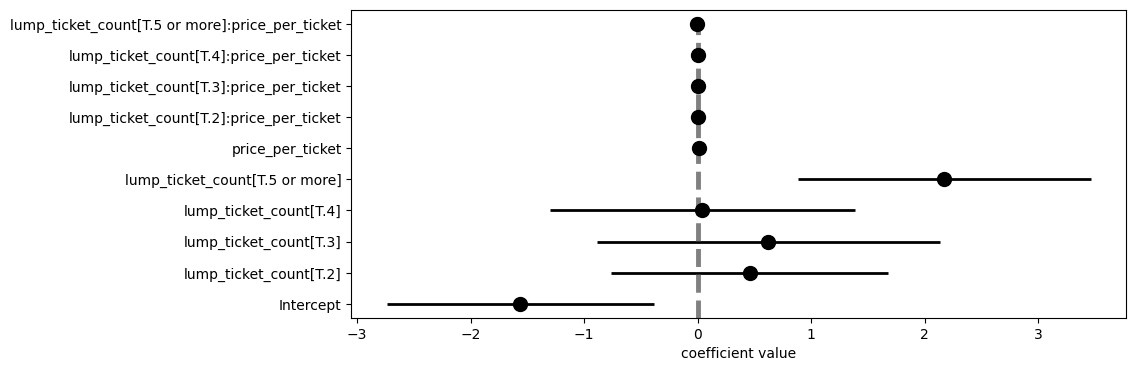

In [246]:
my_coefplot(fit_08)

##### Predict probability and class

In [247]:
df_clean_08 = df_clean.copy()

In [248]:
df_clean_08['pred_probability'] = fit_08.predict(df_clean)

In [249]:
df_clean_08['pred_class'] = np.where( df_clean_08.pred_probability > 0.5, 1, 0 )

In [250]:
df_clean_08

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.748840           1  
1             0.872750           1  
2             0.704551           1  
3             0.785321           1  
4             0.704551           1  
...                ...         ...  
3355          0.511848           1  
3356          0.589141           1  
3357          0.674412           1  
3358          0.674412           1  
3359          0.589141           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [251]:
confusion_matrix( df_clean_08.return_next_season_b.to_numpy(), df_clean_08.pred_class.to_numpy() )

array([[ 130,  995],
       [  85, 2150]], dtype=int64)

In [252]:
TN, FP, FN, TP = confusion_matrix( df_clean_08.return_next_season_b.to_numpy(), df_clean_08.pred_class.to_numpy() ).ravel()

##### Accuracy

In [253]:
np.mean( df_clean_08.return_next_season_b == df_clean_08.pred_class )

0.6785714285714286

In [254]:
Accuracy_08 = (TN + TP) / (TN + TP + FN + FP)

In [255]:
Accuracy_08

0.6785714285714286

##### Sensitivity

In [256]:
Sensitivity_08 = TP / (TP + FN)

In [257]:
Sensitivity_08

0.9619686800894854

##### Specificity

In [258]:
Specificity_08 = TN / (TN + FP)

In [259]:
Specificity_08

0.11555555555555555

##### False Positive Rate

In [260]:
FPR_08 = 1 - Specificity_08

In [261]:
FPR_08

0.8844444444444445

#####  ROC Curve

In [262]:
fpr_08, tpr_08, threshold_08 = roc_curve( df_clean_08.return_next_season_b.to_numpy(), df_clean_08.pred_probability.to_numpy() )

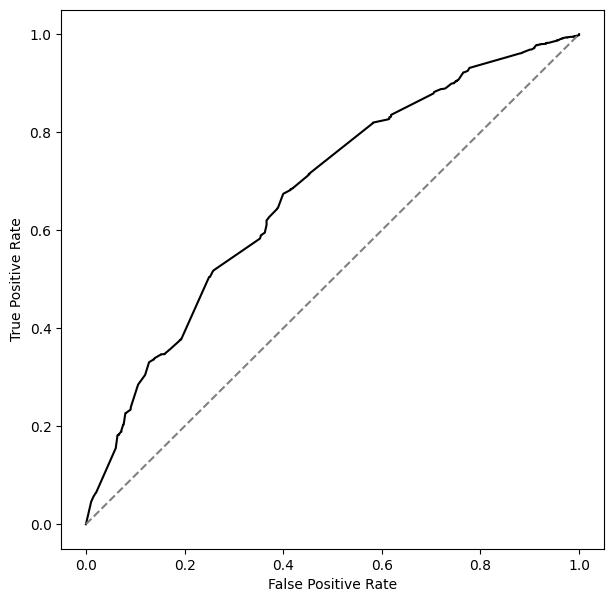

In [263]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_08, tpr_08, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [264]:
roc_auc_score( df_clean_08.return_next_season_b.to_numpy(), df_clean_08.pred_probability.to_numpy() )

0.6759691772309222

##### Classification information:

Confusion Matrix - 
array([[ 130,  995],
       [  85, 2150]], dtype=int64)

Accuracy - 0.679

Sensitivity - 0.962

Specificity - 0.116

False Positive Rate - 0.884

ROC AUC Value - 0.676

##### Model Eight has 10 coefficients that are estimated, of which three are statistically significant at a p-value of 0.05. These coefficients are: 

Intercept

lump_ticket_count[T.5 or more]

price_per_ticket

##### From the 3 significant coefficients the following two are positive and when they increase, the return_next_season will also increase: 

price_per_ticket

lump_ticket_count[T.5 or more]

##### The remaining one is negative and when they decrease so will the likely hood that return_next_season will decrease: 

Intercept

##### Magnitude
The coefficient lump_ticket_count[T.5 or more]:price_per_ticket has the highest magnitude of 0.0066. price_per_ticket has a magnitude of 0.0093 and is the second highest.

##### Model Nine: lump_gender * lump_ticket_count * price_per_ticket

In [265]:
fit_09 = smf.logit(formula='return_next_season_b ~ lump_ticket_count * lump_gender * price_per_ticket', data=df_clean).fit()

         Current function value: 0.554485
         Iterations: 35


C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [266]:
fit_09.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     return_next_season_b   No. Observations:                 3360
Model:                            Logit   Df Residuals:                     3340
Method:                             MLE   Df Model:                           19
Date:                  Sat, 27 Apr 2024   Pseudo R-squ.:                  0.1303
Time:                          00:22:30   Log-Likelihood:                -1863.1
converged:                        False   LL-Null:                       -2142.1
Covariance Type:              nonrobust   LLR p-value:                3.370e-106
==========================================================================================================================================
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 -3.9167      0.987     -3.969      0.000      -5.851      -1.982
lump_ticket_count[T.2]                                                     5.7006      1.405      4.059      0.000       2.948       8.454
lump_ticket_count[T.3]                                                    19.1517        nan        nan        nan         nan         nan
lump_ticket_count[T.4]                                                     5.8776        nan        nan        nan         nan         nan
lump_ticket_count[T.5 or more]                                            11.4331      4.581      2.496      0.013       2.455      20.412
lump_gender[T.unknown]                                                     2.3251      0.796      2.921      0.003       0.765       3.885
lump_ticket_count[T.2]:lump_gender[T.unknown]                             -5.2851      1.292     -4.092      0.000      -7.817      -2.754
lump_ticket_count[T.3]:lump_gender[T.unknown]                            -18.3575        nan        nan        nan         nan         nan
lump_ticket_count[T.4]:lump_gender[T.unknown]                             -6.1695        nan        nan        nan         nan         nan
lump_ticket_count[T.5 or more]:lump_gender[T.unknown]                     -9.3392      4.552     -2.052      0.040     -18.261      -0.417
price_per_ticket                                                           0.0297      0.007      3.969      0.000       0.015       0.044
lump_ticket_count[T.2]:price_per_ticket                                   -0.0255      0.009     -2.951      0.003      -0.042      -0.009
lump_ticket_count[T.3]:price_per_ticket                                    0.0906        nan        nan        nan         nan         nan
lump_ticket_count[T.4]:price_per_ticket                                   -0.0238      0.004     -5.919      0.000      -0.032      -0.016
lump_ticket_count[T.5 or more]:price_per_ticket                           -0.0418      0.016     -2.653      0.008      -0.073      -0.011
lump_gender[T.unknown]:price_per_ticket                                   -0.0211      0.007     -3.061      0.002      -0.035      -0.008
lump_ticket_count[T.2]:lump_gender[T.unknown]:price_per_ticket             0.0241      0.008      2.939      0.003       0.008       0.040
lump_ticket_count[T.3]:lump_gender[T.unknown]:price_per_ticket            -0.0932        nan        nan        nan         nan         nan
lump_ticket_count[T.4]:lump_gender[T.unknown]:price_per_ticket             0.0260      0.002     10.563      0.000       0.021       0.031
lump_ticket_count[T.5 or more]:lump_gender[T.unknown]:price_per_ticket     0.0352      0.016      2.266      0.023       0.005       0.066
==========================

In [267]:
fit_09.pvalues

Intercept                                                                 7.226601e-05
lump_ticket_count[T.2]                                                    4.936516e-05
lump_ticket_count[T.3]                                                             NaN
lump_ticket_count[T.4]                                                             NaN
lump_ticket_count[T.5 or more]                                            1.256761e-02
lump_gender[T.unknown]                                                    3.493897e-03
lump_ticket_count[T.2]:lump_gender[T.unknown]                             4.275262e-05
lump_ticket_count[T.3]:lump_gender[T.unknown]                                      NaN
lump_ticket_count[T.4]:lump_gender[T.unknown]                                      NaN
lump_ticket_count[T.5 or more]:lump_gender[T.unknown]                     4.020184e-02
price_per_ticket                                                          7.212185e-05
lump_ticket_count[T.2]:price_per_ticket    

In [268]:
fit_09.pvalues < 0.05

Intercept                                                                  True
lump_ticket_count[T.2]                                                     True
lump_ticket_count[T.3]                                                    False
lump_ticket_count[T.4]                                                    False
lump_ticket_count[T.5 or more]                                             True
lump_gender[T.unknown]                                                     True
lump_ticket_count[T.2]:lump_gender[T.unknown]                              True
lump_ticket_count[T.3]:lump_gender[T.unknown]                             False
lump_ticket_count[T.4]:lump_gender[T.unknown]                             False
lump_ticket_count[T.5 or more]:lump_gender[T.unknown]                      True
price_per_ticket                                                           True
lump_ticket_count[T.2]:price_per_ticket                                    True
lump_ticket_count[T.3]:price_per_ticket 

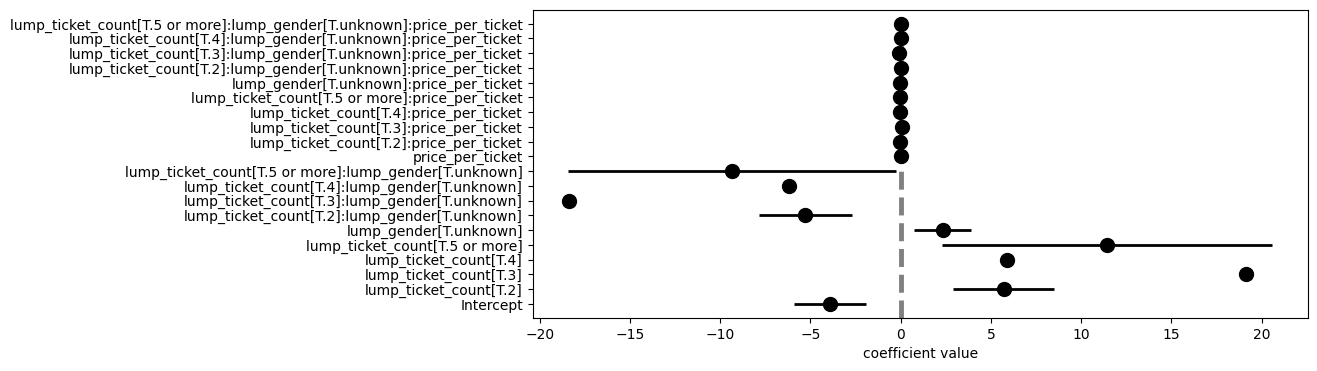

In [269]:
my_coefplot(fit_09)

##### Predict probability and class

In [270]:
df_clean_09 = df_clean.copy()

In [271]:
df_clean_09['pred_probability'] = fit_09.predict(df_clean)

In [272]:
df_clean_09['pred_class'] = np.where( df_clean_09.pred_probability > 0.5, 1, 0 )

In [273]:
df_clean_09

accountid  distancemiles direction  season purchase_month purchase_dow  \
0             1      10.816739         N    2016        Jan-Feb          Mon   
1             2       8.140205        NE    2016        Jan-Feb          Wed   
2             3      39.413746         S    2016        Mar-Apr        Other   
3             4      18.678836         W    2016        Jan-Feb        Other   
4             5      16.487613         W    2016        Jan-Feb          Wed   
...         ...            ...       ...     ...            ...          ...   
3355       3356       9.537710         E    2016        Jan-Feb          Thu   
3356       3357       0.584306         N    2016        Jan-Feb          Mon   
3357       3358       6.161834         N    2016        Mar-Apr          Fri   
3358       3359      15.710909         W    2016        Jan-Feb          Mon   
3359       3360      65.500448         S    2016        Jan-Feb          Wed   

     price_type         price_level  price_per_ticket return_next_season  \
0             A   Lower Panther Red             252.0                YES   
1             A               Other             387.0                YES   
2             A  Lower Panther Blue             252.0                YES   
3             A   Lower Panther Red             252.0                YES   
4             A  Lower Panther Blue             252.0                 NO   
...         ...                 ...               ...                ...   
3355          A               Other             147.0                YES   
3356       IA-2      Lower End Zone             187.0                YES   
3357       IA-2               Other             234.0                YES   
3358          A               Other             234.0                YES   
3359          A      Lower End Zone             187.0                YES   

     lump_gender  bin_age lump_ticket_count  return_next_season_b  \
0        unknown  Unknown                 3                     1   
1        unknown  Unknown                 2                     1   
2          Known        B                 2                     1   
3        unknown        A         5 or more                     1   
4        unknown  Unknown                 2                     0   
...          ...      ...               ...                   ...   
3355     unknown  Unknown                 2                     1   
3356     unknown        B                 2                     1   
3357     unknown        A                 2                     1   
3358     unknown        B                 2                     1   
3359     unknown        A                 2                     1   

      pred_probability  pred_class  
0             0.668234           1  
1             0.828417           1  
2             0.944370           1  
3             0.729739           1  
4             0.649066           1  
...                ...         ...  
3355          0.467210           0  
3356          0.538163           1  
3357          0.619400           1  
3358          0.619400           1  
3359          0.538163           1  

[3360 rows x 16 columns]

##### Confusion Matrix

In [274]:
confusion_matrix( df_clean_09.return_next_season_b.to_numpy(), df_clean_09.pred_class.to_numpy() )

array([[ 324,  801],
       [ 197, 2038]], dtype=int64)

In [275]:
TN, FP, FN, TP = confusion_matrix( df_clean_09.return_next_season_b.to_numpy(), df_clean_09.pred_class.to_numpy() ).ravel()

##### Accuracy

In [276]:
np.mean( df_clean_09.return_next_season_b == df_clean_09.pred_class )

0.7029761904761904

In [277]:
Accuracy_09 = (TN + TP) / (TN + TP + FN + FP)

In [278]:
Accuracy_09

0.7029761904761904

##### Sensitivity

In [279]:
Sensitivity_09 = TP / (TP + FN)

In [280]:
Sensitivity_09

0.9118568232662192

##### Specificity

In [281]:
Specificity_09 = TN / (TN + FP)

In [282]:
Specificity_09

0.288

##### False Positive Rate

In [283]:
FPR_09 = 1 - Specificity_09

In [284]:
FPR_09

0.712

#####  ROC Curve

In [285]:
fpr_09, tpr_09, threshold_09 = roc_curve( df_clean_09.return_next_season_b.to_numpy(), df_clean_09.pred_probability.to_numpy() )

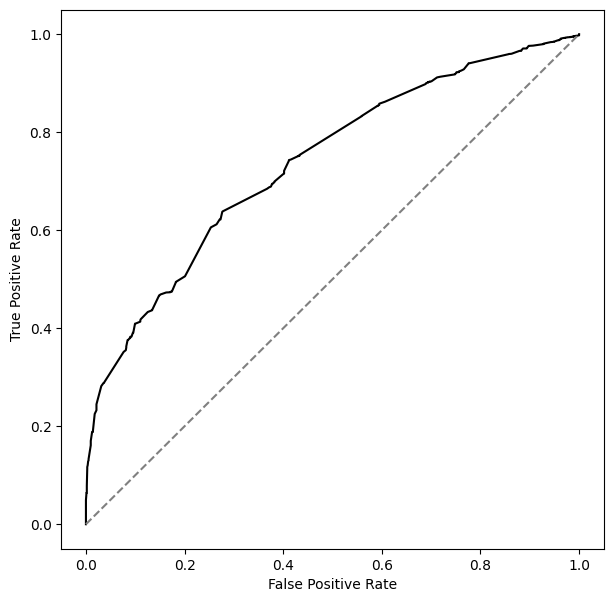

In [286]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_09, tpr_09, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

##### Area Under the ROC curve (ROC AUC) value

In [287]:
roc_auc_score( df_clean_09.return_next_season_b.to_numpy(), df_clean_09.pred_probability.to_numpy() )

0.7361348247576436

##### Classification information:

Confusion Matrix - 
array([[ 324,  801],
       [ 197, 2038]], dtype=int64)

Accuracy - 0.703

Sensitivity - 0.912

Specificity - 0.288

False Positive Rate - 0.712

ROC AUC Value - 0.736

##### Model Nine has 20 coefficients that are estimated, of which six are statistically significant at a p-value of 0.05. These coefficients are: 

Intercept

lump_ticket_count[T.2]

lump_ticket_count[T.5 or more]

price_per_ticket

lump_ticket_count[T.2]:price_per_ticket

lump_ticket_count[T.5 or more]:price_per_ticket

##### From the six significant coefficients the following three are positive and when they increase, the return_next_season will also increase: 

lump_ticket_count[T.2]

lump_ticket_count[T.5 or more]

price_per_ticket

##### The remaining three are negative and when they decrease so will the likely hood that return_next_season will decrease: 

Intercept

lump_ticket_count[T.2]:price_per_ticket

lump_ticket_count[T.5 or more]:price_per_ticket

##### Magnitude
The coefficient lump_ticket_count[T.2] has the highest magnitude of 0.0255. lump_ticket_count[T.5 or more]:price_per_ticket has a magnitude of 0.0418 and is the second highest.

According to the Pseudo R-squared values, Model 4 will work best for the training set since it is the highest. This model is also the best when looking at Accuracy (0.771) and ROC AUC Value (0.823) showing that this is the best model. 

Model 4 is also better than Model 5 which is the intercept-only model as it has a higher Accuracy and ROC AUC value. Model 4 has 20 associated coefficients. 

### Predictions

In [288]:
df_clean.head()

accountid  distancemiles direction  season purchase_month purchase_dow  \
0          1      10.816739         N    2016        Jan-Feb          Mon   
1          2       8.140205        NE    2016        Jan-Feb          Wed   
2          3      39.413746         S    2016        Mar-Apr        Other   
3          4      18.678836         W    2016        Jan-Feb        Other   
4          5      16.487613         W    2016        Jan-Feb          Wed   

  price_type         price_level  price_per_ticket return_next_season  \
0          A   Lower Panther Red             252.0                YES   
1          A               Other             387.0                YES   
2          A  Lower Panther Blue             252.0                YES   
3          A   Lower Panther Red             252.0                YES   
4          A  Lower Panther Blue             252.0                 NO   

  lump_gender  bin_age lump_ticket_count  return_next_season_b  
0     unknown  Unknown                 3                     1  
1     unknown  Unknown                 2                     1  
2       Known        B                 2                     1  
3     unknown        A         5 or more                     1  
4     unknown  Unknown                 2                     0

In [289]:
from itertools import product

#### Predictions

Starting with comprehensive input grid by incorporating a range of values for 'price_per_ticket' and 'distancemiles', along with the unique categories of 'purchase_month', and setting other categorical variables to their most common occurrences.

In [290]:
min_price_per_ticket = df_clean['price_per_ticket'].min()
max_price_per_ticket = df_clean['price_per_ticket'].max()
min_distancemiles = df_clean['distancemiles'].min()
max_distancemiles = df_clean['distancemiles'].max()

# Generating the grid
price_per_ticket_grid = np.linspace(min_price_per_ticket, max_price_per_ticket, 101)
distancemiles_grid = np.linspace(min_distancemiles, max_distancemiles, 5)

purchase_month_categories = df_clean['purchase_month'].unique()

lump_gender_mode = df_clean['lump_gender'].mode()[0]
purchase_dow_mode = df_clean['purchase_dow'].mode()[0]
price_type_mode = df_clean['price_type'].mode()[0]
price_level_mode = df_clean['price_level'].mode()[0]

input_grid = pd.DataFrame(list(product(
    price_per_ticket_grid, purchase_month_categories, distancemiles_grid
)), columns=['price_per_ticket', 'purchase_month', 'distancemiles'])

input_grid['lump_gender'] = lump_gender_mode
input_grid['purchase_dow'] = purchase_dow_mode
input_grid['price_type'] = price_type_mode
input_grid['price_level'] = price_level_mode

In [291]:
input_grid.head()

price_per_ticket purchase_month  distancemiles lump_gender purchase_dow  \
0               0.0        Jan-Feb       0.156212     unknown          Mon   
1               0.0        Jan-Feb      68.439000     unknown          Mon   
2               0.0        Jan-Feb     136.721788     unknown          Mon   
3               0.0        Jan-Feb     205.004576     unknown          Mon   
4               0.0        Jan-Feb     273.287364     unknown          Mon   

  price_type price_level  
0          A       Other  
1          A       Other  
2          A       Other  
3          A       Other  
4          A       Other

Let's start predicting with the model with ALL inputs and linear additive features first:

In [292]:
df_viz = input_grid.copy()
df_viz['predicted_probability'] = fit_04.predict(input_grid)

Creating line plots with FacetGrid to display the predicted probability against ticket price, categorized by purchase month and colored by distance, providing insights into the impact of these variables on the likelihood of return next season.

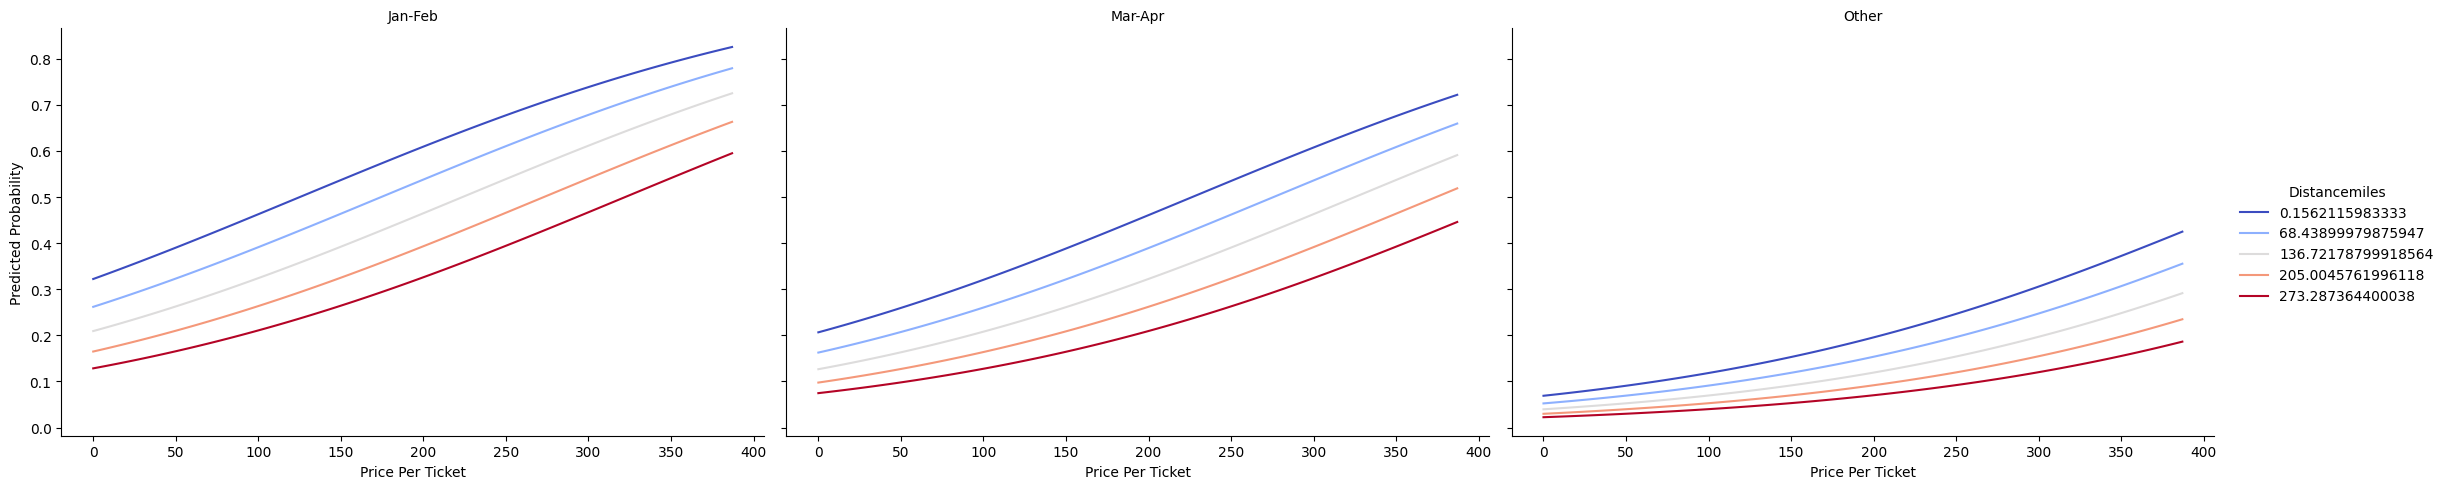

In [293]:
g = sns.FacetGrid(df_viz, col='purchase_month', height=5, aspect=1.5)
g.map(sns.lineplot, 'price_per_ticket', 'predicted_probability', 'distancemiles', palette='coolwarm')

g.set_titles('{col_name}')
g.set_axis_labels('Price Per Ticket', 'Predicted Probability')
g.add_legend(title='Distancemiles')

plt.show()

There is a positive relationship between Price Per Ticket and the predicted probability across all purchase_month categories and distancemiles values. As the price per ticket increases, the likelihood of the event (e.g., returning next season) also increases.

Higher distances correspond to higher probabilities across all price points, suggesting that customers who travel longer distances have a higher likelihood of the event.

Since the best model and the model ALL inputs and linear additive features are the same, I'm going with the model 6 which has some common grounds with model 4.

In [294]:
df_viz['predicted_probability_next_best'] = fit_06.predict(input_grid)

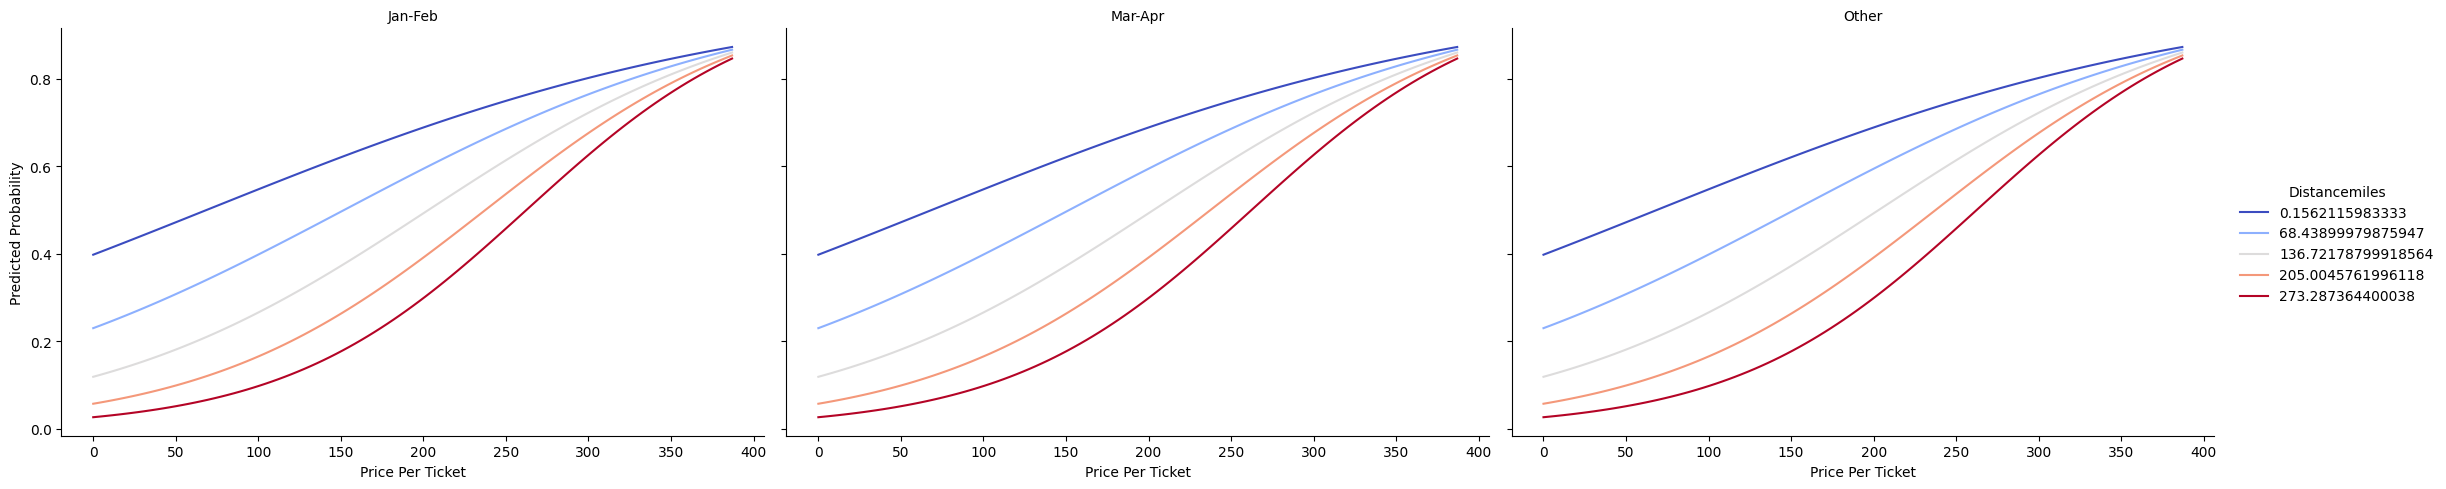

In [295]:
g = sns.FacetGrid(df_viz, col='purchase_month', height=5, aspect=1.5)
g.map(sns.lineplot, 'price_per_ticket', 'predicted_probability_next_best', 'distancemiles', palette='coolwarm')

g.set_titles('{col_name}')
g.set_axis_labels('Price Per Ticket', 'Predicted Probability')
g.add_legend(title='Distancemiles')

plt.show()

Both plots show a positive relationship between Price Per Ticket and predicted probability. This indicates that as the price of the ticket increases, the model predicts a higher likelihood of the event (such as returning next season).

#### Part VI: Models - Performance and Validation

We will use CROSS-VALIDATION to calculate a more reliable estimate of the model performance.

In [296]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

In [297]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#### Preparing the data

In [298]:
y = df_clean['return_next_season_b'].values

In [299]:
model_formulas = {
    'best': 'return_next_season_b ~ np.log(distancemiles + 1) + np.log(price_per_ticket + 1) + lump_gender + purchase_month + purchase_dow + price_type + price_level',
    'simple': 'return_next_season_b ~ np.log(distancemiles + 1) + np.log(price_per_ticket + 1)',
    'complex': 'return_next_season_b ~ lump_ticket_count * lump_gender * np.log(price_per_ticket + 1)'
}

About to conduct cross-validation to assess the predictive performance of different logistic regression models, comparing their AUC scores to select the best-performing one.

In [300]:
metric_fn = roc_auc_score

In [301]:
cv_scores = {name: [] for name in model_formulas.keys()}
for train_index, test_index in skf.split(df_clean, y):
    # Split the data into training and test sets
    df_train, df_test = df_clean.iloc[train_index], df_clean.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for name, formula in model_formulas.items():
        # Fit the model on the training data
        model = smf.logit(formula=formula, data=df_train).fit(disp=0)
        
        y_pred_prob = model.predict(df_test)
        
        score = metric_fn(y_test, y_pred_prob)
        
        cv_scores[name].append(score)

average_scores = {name: np.mean(scores) for name, scores in cv_scores.items()}
average_scores

C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

{'best': 0.803707953282433,
 'simple': 0.6066062261427101,
 'complex': 0.731127563560892}

'best',fit_04 is likely the best model to use for making predictions on new data, given its highest ROC AUC score. 

In [302]:
from scipy import stats

summarizing the cross-validation results by calculating the mean AUC scores and their 95% confidence intervals for each model, and visualizing these metrics to compare model performance.

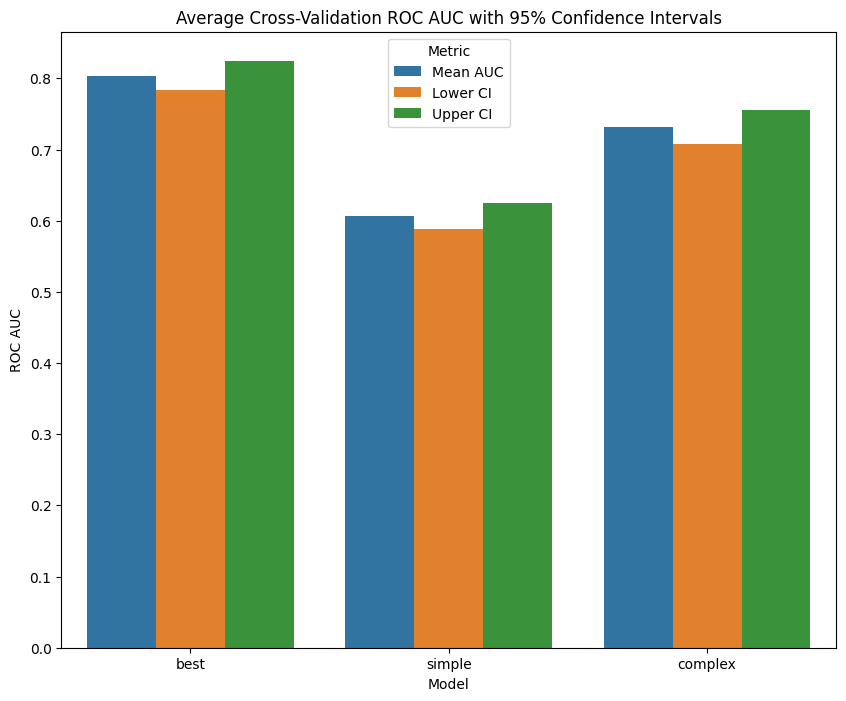

In [303]:
mean_scores = {model: np.mean(scores) for model, scores in cv_scores.items()}
se_scores = {model: stats.sem(scores) for model, scores in cv_scores.items()}

# Calculate the 95% confidence intervals
ci_scores = {model: stats.t.interval(0.95, len(scores)-1, loc=np.mean(scores), scale=stats.sem(scores))
             for model, scores in cv_scores.items()}


df_scores = pd.DataFrame({
    'Model': list(mean_scores.keys()),
    'Mean AUC': list(mean_scores.values()),
    'Lower CI': [ci[0] for ci in ci_scores.values()],
    'Upper CI': [ci[1] for ci in ci_scores.values()]
})

df_melted = df_scores.melt(id_vars='Model', value_vars=['Mean AUC', 'Lower CI', 'Upper CI'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='value', hue='variable', data=df_melted)
plt.title('Average Cross-Validation ROC AUC with 95% Confidence Intervals')
plt.xlabel('Model')
plt.ylabel('ROC AUC')
plt.legend(title='Metric')
plt.show()

The "best" model has the highest mean ROC AUC score, indicating that it performs the best in terms of distinguishing between positive and negative instances on the cross-validation data.
The "complex" model has a slightly lower mean ROC AUC score compared to the "best" model, but the confidence intervals for these two models kind of overlap, suggesting that the difference in their performance may not be statistically significant.
The "simple" model has the lowest mean ROC AUC score and the widest confidence interval, indicating that its performance is the poorest among the three models, and there is greater uncertainty in its ROC AUC estimate.

In [304]:
len(fit_04.params)

21

21 regression coefficients are associated with the best model fit_04

Is this model DIFFERENT from the model identified as the BEST according to the training set? NO

fit_04: Appears to have the highest average ROC AUC score among the three models, indicating the best performance in terms of distinguishing between the classes.
fit_01: Has a lower average ROC AUC score compared to fit_04, which might be due to its simplicity and potentially fewer features.
fit_09: Shows a similar performance to fit_01, despite being more complex. The complexity does not necessarily translate to a higher average ROC AUC score.
It seems to confirm the earlier conclusion that fit_04 is the strongest model among the ones considered.

#### BONUS

#### RIDGE

Performing Ridge regularization on a logistic regression model and tuning the regularization strength (alpha) using cross-validation.

In [305]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import OneHotEncoder

In [306]:
# Prepare the data
X = df_clean[['lump_ticket_count', 'lump_gender', 'price_per_ticket']]
y = df_clean['return_next_season_b']

In [307]:
# One-hot encode categorical variables
enc = OneHotEncoder(handle_unknown='ignore')
X_encoded = enc.fit_transform(X[['lump_ticket_count', 'lump_gender']])
X_encoded = np.concatenate((np.log1p(X[['price_per_ticket']].values), X_encoded.toarray()), axis=1)

In [308]:
categorical_feature_names = enc.get_feature_names_out(['lump_ticket_count', 'lump_gender'])

all_feature_names = np.concatenate([['log_price_per_ticket'], categorical_feature_names])

In [310]:
ridge_tune = LogisticRegressionCV(penalty='l2', Cs=101, solver='lbfgs', max_iter=25001, cv=skf, fit_intercept=False).fit( X_encoded, y.ravel() )

#### Best C (inverse of regularization strength)

In [311]:
ridge_tune.C_

array([0.0001])

The output shows that the best C determined by the model is very close to 0, which suggests a high degree of regularization.

#### Coefficients:

In [312]:
dict(zip(all_feature_names, ridge_tune.coef_.flatten()))

{'log_price_per_ticket': 0.09012584949409473,
 'lump_ticket_count_1': -0.00010077242442485598,
 'lump_ticket_count_2': 0.004458565108607102,
 'lump_ticket_count_3': 0.0019248088200910843,
 'lump_ticket_count_4': 0.004664725374266409,
 'lump_ticket_count_5 or more': 0.004799804839191939,
 'lump_gender_Known': 0.019052830251585884,
 'lump_gender_unknown': -0.003305698533854215}

The coefficients are the model's estimates after tuning, indicating the strength and direction of the relationship between each feature and the target variable.

#### LASSO

Performing Lasso regularization (L1 penalty) on a logistic regression model and tuning the regularization strength (alpha) using cross-validation.

In [314]:
lasso_tune = LogisticRegressionCV(penalty='l1', Cs=101, solver='saga', max_iter=25001, cv=skf, fit_intercept=False).fit( X_encoded, y.ravel() )

#### Best C (inverse of regularization strength)

In [315]:
lasso_tune.C_

array([1.20226443])

A larger value of C corresponds to weaker regularization, so in this case, the model has chosen a relatively weak regularization strength.

#### Coefficients:

In [316]:
dict(zip(all_feature_names, lasso_tune.coef_.flatten()))

{'log_price_per_ticket': 0.2740647236864542,
 'lump_ticket_count_1': -0.2476955923858356,
 'lump_ticket_count_2': -0.1444314031406152,
 'lump_ticket_count_3': 0.0,
 'lump_ticket_count_4': 0.05711665640479253,
 'lump_ticket_count_5 or more': 0.6325125062632468,
 'lump_gender_Known': 1.5305551139207183,
 'lump_gender_unknown': -0.9790360911559881}

'lump_ticket_count_3' is set to 0, which suggests this features are not contributing to the model.

#### ELASTIC NET

Performing Elastic Net regularization on a logistic regression model and tuning both the regularization strength (alpha) and the mixing parameter (l1_ratio) using cross-validation.

In [318]:
enet_tune = LogisticRegressionCV(penalty='elasticnet', solver='saga', max_iter=25001, fit_intercept=False,
                                 cv=skf,
                                 Cs=25, l1_ratios=np.linspace(0,1,num=7)).fit(X_encoded, y.ravel())

In [319]:
enet_tune.C_

array([0.0001])

A very small C value suggests a stronger Lasso effect in the regularization

In [324]:
enet_tune.l1_ratio_

array([0.])

In [321]:
dict(zip(all_feature_names, enet_tune.coef_.flatten()))

{'log_price_per_ticket': 0.09013123726071431,
 'lump_ticket_count_1': -0.00010099508127508961,
 'lump_ticket_count_2': 0.004469161821402248,
 'lump_ticket_count_3': 0.001921437004616522,
 'lump_ticket_count_4': 0.004659282484076712,
 'lump_ticket_count_5 or more': 0.004799039783851839,
 'lump_gender_Known': 0.01904753031893909,
 'lump_gender_unknown': -0.0032996043062668745}

The tuned model is closer to Ridge as there are no non-zero coefficients